#한글 폰트설치

In [ ]:
# 필수 라이브러리 설치
!pip install konlpy wordcloud matplotlib

# 한글 폰트 설정 (NanumGothic)
!apt-get update -qq
!apt-get install fonts-nanum -qq

# 폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from wordcloud import WordCloud

# 폰트 설정 함수
def set_korean_font():
    # 폰트 경로
    font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
    # fm._rebuild()  <- Remove or comment out this line.
    # Use the following to clear the font cache
    fm.fontManager.addfont(font_path)
    fm._load_fontmanager(try_read_cache=False) # This forces a rebuild without the internal method

    plt.rc('font', family='NanumGothic')
    plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지
    print("한글 폰트 설정 완료:", font_path)
    return font_path

# 한글 폰트 설정 실행
font_path = set_korean_font()

# 기타 라이브러리 Import
import re
from konlpy.tag import Komoran
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 77.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 494.1/494.1 kB 42.0 MB/s eta 0:00:00
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 124926 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
한글 폰트 설정 완료: /usr/share/fonts/truetype/nanum/NanumGothic.ttf


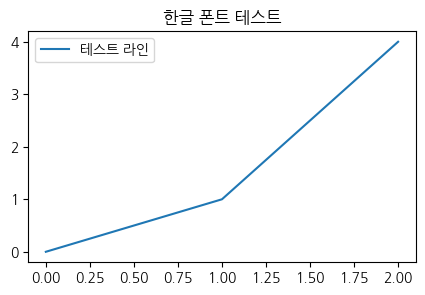

In [ ]:
# 테스트용 그래프
plt.figure(figsize=(5, 3))
plt.title("한글 폰트 테스트")
plt.plot([0, 1, 2], [0, 1, 4], label="테스트 라인")
plt.legend()
plt.show()


#데이터전처리

In [ ]:
# 파일 경로 및 데이터 로드
file_paths = {
    "2015년 데이터": '/content/2015 중학교 기가 교과서 5종 생활자원 전체.txt',
    "2022년 데이터": '/content/20022 중학교 기가 교과서 5종 생활 자원 전체.txt',
}

category_files = [
    '/content/1. 빈곤퇴치.txt',
    '/content/2. 기아종식.txt',
    '/content/3. 건강과 웰빙중심.txt',
    '/content/4. 양질의 교육 보장.txt',
    '/content/5. 성평등 달성.txt',
    '/content/6. 깨끗한 물과 위생 보장.txt',
    '/content/7. 모두를 위한 에너지 보장.txt',
    '/content/8. 경제성장과 양질의 일자리.txt',
    '/content/9. 사회기반 시설 산업화 및 혁신.txt',
    '/content/10. 불평등 감소.txt',
    '/content/11. 지속가능한 도시와 주거지.txt',
    '/content/12. 지속가능한 소비와 생산.txt',
    '/content/13. 기후변화 대응.txt',
    '/content/14. 해양생태계 보존.txt',
    '/content/15. 육상생태계 보호.txt',
    '/content/16. 평화, 정의, 포용적인 제도.txt',
    '/content/17. 글로벌 파트너십.txt',
]

# 데이터 로드 함수
def load_texts(file_paths):
    data = {}
    for key, path in file_paths.items():
        with open(path, 'r', encoding='utf-8') as f:
            data[key] = f.read()
    return data

# 카테고리 로드 함수
def load_categories(file_paths):
    categories = []
    for path in file_paths:
        with open(path, 'r', encoding='utf-8') as f:
            categories.append(f.read())
    return categories

# 데이터 로드
text_data = load_texts(file_paths)
categories = load_categories(category_files)

# 데이터 확인
for key, content in text_data.items():
    print(f"{key} 일부:\n", content[:50])

print("category1 데이터 일부 (1부터 17까지):")
for i, category in enumerate(categories, start=1):
    print(f"문서 {i}: {category[:50]}")


2015년 데이터 일부:
 ns      문학으로 보는 시 간

다음 시에서 화자가 무엇을 후회하고 있는지 생각하며 
2022년 데이터 일부:
 
생활 속의

환경

기념일

4월 4일

종이 안 쓰는 날

환경 기념일은 환경을 생각하
category1 데이터 일부 (1부터 17까지):
문서 1: 1. 모든 곳에서 모든 형태의 빈곤 종식

1.1 2030년까지 현재 기준으로 하루에 $1
문서 2: 2. 기아 종식, 안전하고 영양이 개선된 식량 달성, 지속가능한 농업 장려

2.1 203
문서 3: 3. 모든 연령층을 위한 건강한 삶 보장과 웰빙 증진

3.1 2030년까지 전 세계 산모
문서 4: 4. 포용적이고 공평한 양질의 교육보장과 모두를 위한 평생학습 기회 증진

4.1 2030
문서 5: 5. 성평등 달성과 모든 여성 및 여아의 권익신장

5.1 모든 곳에서 여성 및 여아를 대
문서 6: 6. 모두를 위한 물과 위생의 이용가능성과 지속가능한 관리 보장

6.1 2030년까지 모
문서 7: 7. 모두를 위한 적정가격의 신뢰할 수 있고 지속가능하며 현대적인 에너지에 대한 접근 보장
문서 8: 8. 지속적&#65381;포용적&#65381;지속가능한 경제성장, 완전하고 생산적인 고용과
문서 9: 9. 회복력 있는 사회기반시설 구축, 포용적이고 지속가능한 산업화 증진과 혁신 도모

9.
문서 10: 10. 국내 및 국가 간 불평등 감소

10.1 2030년까지 하위 40% 인구의 소득성장
문서 11: 11. 포용적이고 안전하며 회복력 있고 지속가능한 도시와 주거지 조성

11.1 2030년
문서 12: 12. 지속가능한 소비와 생산 양식의 보장

12.1 개발도상국의 발전 상황과 역량을 고려
문서 13: 13. 기후변화와 그로 인한 영향에 맞서기 위한 긴급 대응

13.1 모든 국가에서 기후 
문서 14: 14. 지속가능발전을 위하여 대양, 바다, 해양자원의 보전과 지속가능한 이용

14.1 2
문서 15: 15. 육상생태계 보호, 복원 및 지속가능한 이용 증

In [ ]:
import re
from konlpy.tag import Komoran

# Komoran 형태소 분석기 초기화
komoran = Komoran()

# 불용어 리스트를 공백으로 설정 (필요시 추가 가능)
stopwords = ['소비자']

def preprocess_nouns(text, stopwords=[]):
    """
    텍스트에서 한글 명사만 추출하고, 공백 및 줄바꿈 제거, 불용어 처리.
    """
    try:
        # 특수문자 및 공백 제거
        text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣]', ' ', text)  # 한글 이외 제거 후 공백으로 대체
        text = re.sub(r'\s+', ' ', text).strip()  # 연속 공백 제거 및 양끝 공백 제거

        # 명사 추출
        nouns = komoran.nouns(text)

        # 불용어 제거
        filtered_nouns = [noun for noun in nouns if noun not in stopwords]

        # 결과를 공백으로 연결
        return ' '.join(filtered_nouns)
    except Exception as e:
        print(f"전처리 중 오류 발생: {e}")
        return ""


In [ ]:
# 텍스트 전처리
preprocessed_texts = {key: preprocess_nouns(content, stopwords) for key, content in text_data.items()}
preprocessed_categories = [preprocess_nouns(category, stopwords) for category in categories]

# 결과 확인
print("2015년 데이터 전처리 결과:\n", preprocessed_texts["2015년 데이터"][:100])
print("2022년 데이터 전처리 결과:\n", preprocessed_texts["2022년 데이터"][:100])
print("카테고리 데이터 전처리 결과 (1부터 17까지):")
for i, category in enumerate(preprocessed_categories, start=1):
    print(f"문서 {i} 전처리 결과: {category[:100]}")

2015년 데이터 전처리 결과:
 문학 시 간 다음 시 화자 후회 생각 시 순간 꽃봉오리 인 것 정현종 후회 그때 일 노다지 도 그때 그사람 그때 물건 노다지 도 말 귀 벙어리 귀머거리 순간 사랑 것 순간 꽃봉오리
2022년 데이터 전처리 결과:
 생활 속 환경 기념일 월 일 종이 날 환경 기념일 환경 생각 행동 지정 날 환경 보호 자원 순환 리가 참여 수 환경 기념일 생활 자원 생활 환경 중 등기 견본 오후 월 일 세계 차
카테고리 데이터 전처리 결과 (1부터 17까지):
문서 1 전처리 결과: 곳 형태 빈곤 종식 년 기준 하루 미만 사람 곳 절대 빈곤 인구 근절 년 국가 정의 측면 연령 남녀 아동 빈곤 인구 비율 최소한 절반 사회 안전망 포함 모두 국가 사회 보호 체제 
문서 2 전처리 결과: 기아 종식 안전 영양 개선 식량 달성 지속 농업 장려 년 기아 종식 영유아 포함 사람 빈곤 계층 연중 안전 영양가 식량 접근 보장 년 미만 아동 발육 부진 체력 저하 국제 합의 목
문서 3 전처리 결과: 연령 건강 삶 보장 웰빙 증진 년 세계 산모 사망 비율 건의 생존 출산 당 건 미만 감소 년 신생아 미만 아동 예방 사망 종식 국가 신생아 사망 건의 생존 출산 당 건 미만 사망 
문서 4 전처리 결과: 포용 공평 양질 교육 보장 모두 평생 학습 기회 증진 년 여아 남아 효과 학습 성과 수 공평 양질 무상 초등 교육 중등 교육 이수 보장 년 여아 남아 양질 영유아 발달 교육 보육 
문서 5 전처리 결과: 성 평등 달성 여성 여아 권익 신장 곳 여성 여아 대상 형태 차별 인신매매 성 착취 기타 유형 착취 포함 공적 사적 영역 여성 여아 대상 형태 폭력 조혼 강제 결혼 여성 할례 등 
문서 6 전처리 결과: 모두 물 위생 이용 지속 관리 보장 년 모두 적정 가격 안전 식수 보편 공평 접근 달성 년 여성 여아 상황 사람 요구 주의 모두 공평 공중위생 개인 위생 접근 달성 야외 배변 근절
문서 7 전처리 결과: 모두 적정 가격 신뢰 수 지속 현대 에너지 접근 보장 년 적정 

In [ ]:
# 4. 전처리된 텍스트들을 공백 기준으로 토큰화
tokenized_texts = {key: text.split() for key, text in preprocessed_texts.items()}
tokenized_categories = [category.split() for category in preprocessed_categories]

# 5. 결과 확인
print("2015년 데이터 전처리 및 토큰화 결과:\n", tokenized_texts["2015년 데이터"])
print("\n2022년 데이터 전처리 및 토큰화 결과:\n", tokenized_texts["2022년 데이터"])
print("\n카테고리 데이터 토큰화 결과:")
for i, tokens in enumerate(tokenized_categories, start=1):
    print(f"문서 {i} 토큰화 결과: {tokens}")

2015년 데이터 전처리 및 토큰화 결과:
 ['문학', '시', '간', '다음', '시', '화자', '후회', '생각', '시', '순간', '꽃봉오리', '인', '것', '정현종', '후회', '그때', '일', '노다지', '도', '그때', '그사람', '그때', '물건', '노다지', '도', '말', '귀', '벙어리', '귀머거리', '순간', '사랑', '것', '순간', '꽃봉오리', '것', '열심', '꽃봉오리', '것', '시간', '후회', '경험', '이야기', '합리', '자원', '관리', '창의', '융합', '발전소', '청소년', '의자', '원', '관리', '생활', '자원', '관리', '문제', '생활', '자원', '중', '청소년기', '것', '시간', '자원', '이다', '시', '간', '자원', '관리', '시간', '효율', '사용', '하루', '시간', '사용', '내용', '분류', '것', '생활시간', '생활시간', '생리', '생활', '성취', '기준', '생활', '자원', '특성', '이해', '자신', '의', '상황', '생활', '자원', '관리', '문제', '분석', '삶의', '질', '향상', '수', '방법', '탐색', '실천', '생리', '생활시간', '시간', '노동', '생활시간', '여가', '생활시간', '수', '청소년기', '건강', '안정', '생활', '가지', '생활시간', '사용', '조화', '균형', '여가', '생활', '시간', '생명', '건강', '유지', '활동', '데', '필요', '수입', '일', '시간', '가정생활', '가사', '힘', '충전', '시간', '노동', '시간', '학업', '사용', '시간', '수면', '식사', '목욕', '몸단장', '용변', '휴식', '의료', '등', '출퇴근', '근무', '조리', '설거지', '자녀', '청소', '생리', '생활시간', '노동', '생활시간', '제외', '

In [ ]:
from collections import Counter
# 4. 단어 빈도 계산 함수 정의
def calculate_top_frequencies(text, top_n=10):
    """
    텍스트에서 단어 빈도를 계산하고 상위 top_n 단어를 반환.
    """
    words = text.split()  # 공백 기준으로 단어 분리
    word_counts = Counter(words)  # 단어 빈도 계산
    return word_counts.most_common(top_n)  # 상위 top_n 단어 반환

# 5. 각 파일별 상위 빈도 추출
top_frequencies_texts = {
    key: calculate_top_frequencies(content, top_n=10) for key, content in preprocessed_texts.items()
}

top_frequencies_categories = [
    calculate_top_frequencies(category, top_n=10) for category in preprocessed_categories
]

# 6. 결과 확인
print("2015년 데이터 상위 빈도 결과:\n", top_frequencies_texts["2015년 데이터"])
print("\n2022년 데이터 상위 빈도 결과:\n", top_frequencies_texts["2022년 데이터"])

print("\n카테고리 데이터 상위 빈도 결과:")
for i, top_frequencies in enumerate(top_frequencies_categories, start=1):
    print(f"문서 {i} 상위 빈도 결과: {top_frequencies}")

2015년 데이터 상위 빈도 결과:
 [('시간', 429), ('자원', 383), ('관리', 247), ('생활', 206), ('수', 197), ('사용', 129), ('목표', 119), ('계획', 115), ('것', 111), ('일', 111)]

2022년 데이터 상위 빈도 결과:
 [('자원', 535), ('생활', 301), ('수', 183), ('사용', 179), ('환경', 161), ('순환', 97), ('등', 92), ('과정', 89), ('관리', 85), ('생산', 84)]

카테고리 데이터 상위 빈도 결과:
문서 1 상위 빈도 결과: [('빈곤', 9), ('년', 5), ('국가', 3), ('사회', 3), ('계층', 3), ('보장', 3), ('곳', 2), ('종식', 2), ('인구', 2), ('측면', 2)]
문서 2 상위 빈도 결과: [('농업', 6), ('년', 6), ('식량', 5), ('시장', 5), ('접근', 4), ('국제', 4), ('안전', 3), ('영양', 3), ('보장', 3), ('생산', 3)]
문서 3 상위 빈도 결과: [('년', 7), ('사망', 7), ('보건', 7), ('보장', 5), ('국가', 5), ('질병', 5), ('접근', 5), ('세계', 4), ('건강', 3), ('건의', 3)]
문서 4 상위 빈도 결과: [('교육', 14), ('년', 9), ('보장', 7), ('양질', 5), ('기술', 5), ('지속', 4), ('가능', 4), ('학습', 3), ('증진', 3), ('수', 3)]
문서 5 상위 빈도 결과: [('여성', 8), ('평등', 5), ('여아', 4), ('성', 3), ('권익', 3), ('신장', 3), ('증진', 3), ('대상', 2), ('형태', 2), ('착취', 2)]
문서 6 상위 빈도 결과: [('물', 8), ('년', 7), ('위생', 4), ('모두', 3), ('관

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer가 이미 토큰화된 데이터를 처리할 수 있도록 analyzer를 직접 설정합니다.
vectorizer = TfidfVectorizer(analyzer=lambda x: x)
tfidf_matrix = vectorizer.fit_transform(tokenized_categories)
feature_names = vectorizer.get_feature_names_out()

# 각 기준서(문서)별 상위 10개 단어와 해당 TF-IDF 점수를 추출
top_words_per_category = []
for i in range(tfidf_matrix.shape[0]):
    # 각 문서의 TF-IDF 벡터를 1차원 배열로 추출
    row = tfidf_matrix.getrow(i).toarray().flatten()
    # TF-IDF 값이 큰 순서대로 인덱스를 정렬
    sorted_indices = np.argsort(row)[::-1]
    top10 = []
    for idx in sorted_indices:
        if row[idx] <= 0:  # TF-IDF 점수가 0 이하이면 중단
            break
        top10.append((feature_names[idx], row[idx]))
        if len(top10) == 10:
            break
    top_words_per_category.append(top10)
    print(f"문서 {i+1} 상위 10개 단어:", top10)


문서 1 상위 10개 단어: [('빈곤', 0.5298302209081608), ('계층', 0.20717091691317266), ('측면', 0.19359671436967793), ('동등', 0.1690451976330317), ('년', 0.1600312947504845), ('곳', 0.15162561928857698), ('권리', 0.15162561928857698), ('인구', 0.13811394460878176), ('사회', 0.12765451120624463), ('종식', 0.109654524207476)]
문서 2 상위 10개 단어: [('농업', 0.39744221874735153), ('식량', 0.3312018489561263), ('시장', 0.20142760212635827), ('영양', 0.17351972794218973), ('기아', 0.13248073958245052), ('식물', 0.13248073958245052), ('가축', 0.13248073958245052), ('농산물', 0.13248073958245052), ('년', 0.13141378573851623), ('수출', 0.11567981862812647)]
문서 3 상위 10개 단어: [('보건', 0.3800824516702738), ('사망', 0.3800824516702738), ('질병', 0.271487465478767), ('건의', 0.1628924792872602), ('감염', 0.1628924792872602), ('생존', 0.1628924792872602), ('건', 0.1628924792872602), ('백신', 0.1628924792872602), ('의약품', 0.1628924792872602), ('출산', 0.1628924792872602)]
문서 4 상위 10개 단어: [('교육', 0.5914834228418708), ('양질', 0.19435873697536382), ('학습', 0.177662696639989

In [ ]:
# 정확히 '물'이라는 단어만 몇 개 나오는지 확인
count_water_2015 = preprocessed_texts["2015년 데이터"].split().count("시간")
count_water_2022 = preprocessed_texts["2022년 데이터"].split().count("물")

print("2015년 데이터에서 '물' 단어 개수:", count_water_2015)
print("2022년 데이터에서 '물' 단어 개수:", count_water_2022)


2015년 데이터에서 '물' 단어 개수: 429
2022년 데이터에서 '물' 단어 개수: 50


In [ ]:
counter_2015 = Counter(tokenized_texts["2015년 데이터"])
counter_2022 = Counter(tokenized_texts["2022년 데이터"])

print("기준서별 상위 10개 단어의 2015년, 2022년 등장 빈도:")
for idx, top_words in enumerate(top_words_per_category, start=1):
    print(f"\n기준서 {idx}:")
    for word, tfidf_score in top_words:
        count_2015 = counter_2015.get(word, 0)
        count_2022 = counter_2022.get(word, 0)
        print(f"  단어 '{word}': 2015년 = {count_2015}, 2022년 = {count_2022}")

기준서별 상위 10개 단어의 2015년, 2022년 등장 빈도:

기준서 1:
  단어 '빈곤': 2015년 = 0, 2022년 = 0
  단어 '계층': 2015년 = 0, 2022년 = 0
  단어 '측면': 2015년 = 0, 2022년 = 4
  단어 '동등': 2015년 = 1, 2022년 = 0
  단어 '년': 2015년 = 14, 2022년 = 8
  단어 '곳': 2015년 = 1, 2022년 = 3
  단어 '권리': 2015년 = 0, 2022년 = 2
  단어 '인구': 2015년 = 0, 2022년 = 0
  단어 '사회': 2015년 = 12, 2022년 = 19
  단어 '종식': 2015년 = 0, 2022년 = 0

기준서 2:
  단어 '농업': 2015년 = 0, 2022년 = 0
  단어 '식량': 2015년 = 0, 2022년 = 3
  단어 '시장': 2015년 = 1, 2022년 = 5
  단어 '영양': 2015년 = 0, 2022년 = 0
  단어 '기아': 2015년 = 0, 2022년 = 0
  단어 '식물': 2015년 = 0, 2022년 = 0
  단어 '가축': 2015년 = 0, 2022년 = 4
  단어 '농산물': 2015년 = 0, 2022년 = 5
  단어 '년': 2015년 = 14, 2022년 = 8
  단어 '수출': 2015년 = 0, 2022년 = 0

기준서 3:
  단어 '보건': 2015년 = 0, 2022년 = 0
  단어 '사망': 2015년 = 0, 2022년 = 0
  단어 '질병': 2015년 = 0, 2022년 = 2
  단어 '건의': 2015년 = 0, 2022년 = 0
  단어 '감염': 2015년 = 0, 2022년 = 0
  단어 '생존': 2015년 = 0, 2022년 = 2
  단어 '건': 2015년 = 1, 2022년 = 3
  단어 '백신': 2015년 = 0, 2022년 = 0
  단어 '의약품': 2015년 = 0, 2022년 = 1
  단어 '출산':

연도별 전처리:  50%|█████     | 1/2 [00:10<00:10, 10.56s/년]

2015년 데이터 - Total tokens: 6780, Unique tokens: 1020


연도별 전처리: 100%|██████████| 2/2 [00:22<00:00, 11.10s/년]


2022년 데이터 - Total tokens: 7649, Unique tokens: 1307


연도별 처리:   0%|          | 0/2 [00:00<?, ?년/s]


===== 2015년 데이터 =====



기준서 처리:   0%|          | 0/17 [00:00<?, ?문서/s]
                                                     


[기준서 1]
  단어 '빈곤': Count = 0, TF-IDF = 0.530, Contribution = 0.000
  단어 '계층': Count = 0, TF-IDF = 0.207, Contribution = 0.000
  단어 '측면': Count = 0, TF-IDF = 0.194, Contribution = 0.000
  단어 '동등': Count = 1, TF-IDF = 0.169, Contribution = 0.169
  단어 '년': Count = 14, TF-IDF = 0.160, Contribution = 2.240
  단어 '곳': Count = 1, TF-IDF = 0.152, Contribution = 0.152
  단어 '권리': Count = 0, TF-IDF = 0.152, Contribution = 0.000
  단어 '인구': Count = 0, TF-IDF = 0.138, Contribution = 0.000
  단어 '사회': Count = 12, TF-IDF = 0.128, Contribution = 1.532
  단어 '종식': Count = 0, TF-IDF = 0.110, Contribution = 0.000
>> 기준서 1 Final Score: 4.093

[기준서 2]
  단어 '농업': Count = 0, TF-IDF = 0.397, Contribution = 0.000
  단어 '식량': Count = 0, TF-IDF = 0.331, Contribution = 0.000
  단어 '시장': Count = 1, TF-IDF = 0.201, Contribution = 0.201
  단어 '영양': Count = 0, TF-IDF = 0.174, Contribution = 0.000
  단어 '기아': Count = 0, TF-IDF = 0.132, Contribution = 0.000
  단어 '식물': Count = 0, TF-IDF = 0.132, Contribution = 0.000
  단어 '가축':


연도별 처리: 100%|██████████| 2/2 [00:00<00:00, 117.19년/s]


[기준서 1]
  단어 '빈곤': Count = 0, TF-IDF = 0.530, Contribution = 0.000
  단어 '계층': Count = 0, TF-IDF = 0.207, Contribution = 0.000
  단어 '측면': Count = 4, TF-IDF = 0.194, Contribution = 0.774
  단어 '동등': Count = 0, TF-IDF = 0.169, Contribution = 0.000
  단어 '년': Count = 8, TF-IDF = 0.160, Contribution = 1.280
  단어 '곳': Count = 3, TF-IDF = 0.152, Contribution = 0.455
  단어 '권리': Count = 2, TF-IDF = 0.152, Contribution = 0.303
  단어 '인구': Count = 0, TF-IDF = 0.138, Contribution = 0.000
  단어 '사회': Count = 19, TF-IDF = 0.128, Contribution = 2.425
  단어 '종식': Count = 0, TF-IDF = 0.110, Contribution = 0.000
>> 기준서 1 Final Score: 5.238

[기준서 2]
  단어 '농업': Count = 0, TF-IDF = 0.397, Contribution = 0.000
  단어 '식량': Count = 3, TF-IDF = 0.331, Contribution = 0.994
  단어 '시장': Count = 5, TF-IDF = 0.201, Contribution = 1.007
  단어 '영양': Count = 0, TF-IDF = 0.174, Contribution = 0.000
  단어 '기아': Count = 0, TF-IDF = 0.132, Contribution = 0.000
  단어 '식물': Count = 0, TF-IDF = 0.132, Contribution = 0.000
  단어 '가축': 

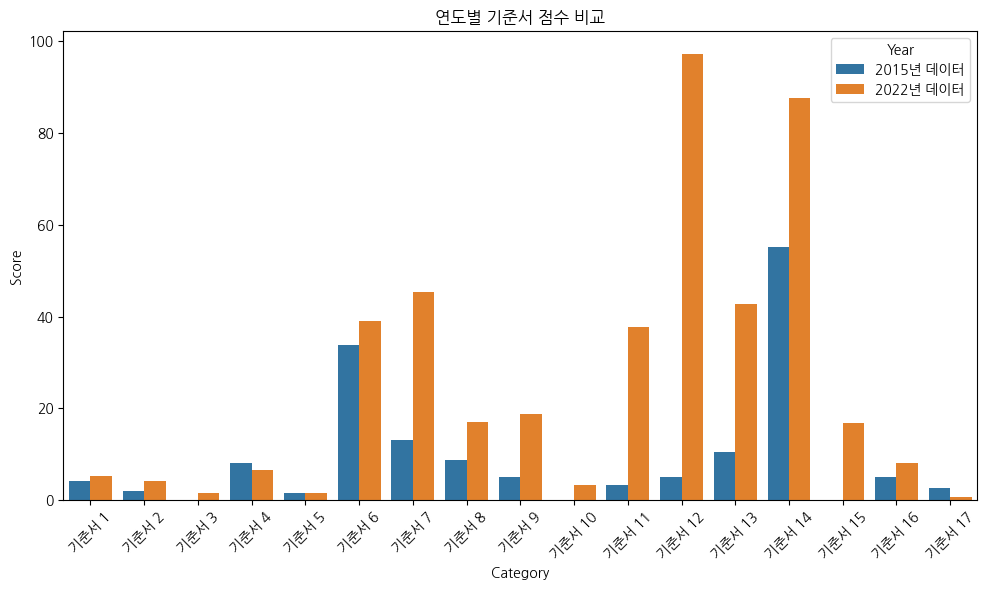


===== Summary Statistics by Year =====
        Year       mean      min        max     median
0  2015년 데이터   9.355631  0.00000  55.221528   5.024023
1  2022년 데이터  25.499212  0.77958  97.281138  16.771205


In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from tqdm import tqdm

# ----------------------------------------
# 전제: text_data, categories, stopwords, preprocess_nouns,
#       top_words_per_category가 이미 정의되어 있음.
# ----------------------------------------

# ====================================================
# Step 1. 연도별 텍스트 전처리 및 토큰 카운터 생성
# ====================================================
year_token_counts = {}  # {year_label: Counter(tokens)}

for year_label, year_text in tqdm(text_data.items(), desc="연도별 전처리", unit="년"):
    # preprocess_nouns 함수는 한글 명사만 남기도록 전처리하는 함수입니다.
    preprocessed_text = preprocess_nouns(year_text, stopwords=stopwords)
    # 공백 기준 토큰화
    tokens = preprocessed_text.split()
    token_counter = collections.Counter(tokens)
    year_token_counts[year_label] = token_counter
    print(f"{year_label} - Total tokens: {len(tokens)}, Unique tokens: {len(token_counter)}")

# ====================================================
# Step 2. 각 연도별 기준서 점수 및 단어별 등장 횟수 계산
# ====================================================
results = []               # 각 기준서별 전체 점수를 저장할 리스트
detailed_word_counts = []  # 단어별 등장 횟수 및 기여 점수 상세 정보를 저장할 리스트

for year_label, token_counter in tqdm(year_token_counts.items(), desc="연도별 처리", unit="년"):
    print(f"\n===== {year_label} =====")
    for cat_idx, top_words in tqdm(enumerate(top_words_per_category, start=1),
                                   total=len(top_words_per_category),
                                   desc="기준서 처리", unit="문서", leave=False):
        cat_score = 0.0
        print(f"\n[기준서 {cat_idx}]")
        for word, weight in top_words:
            # 미리 계산된 token_counter에서 단어의 빈도 조회 (없으면 0)
            count = token_counter.get(word, 0)
            contribution = count * weight
            cat_score += contribution
            print(f"  단어 '{word}': Count = {count}, TF-IDF = {weight:.3f}, Contribution = {contribution:.3f}")
            detailed_word_counts.append({
                "Year": year_label,
                "Category": f"기준서 {cat_idx}",
                "Word": word,
                "TF-IDF": weight,
                "Count": count,
                "Contribution": contribution
            })
        print(f">> 기준서 {cat_idx} Final Score: {cat_score:.3f}")
        results.append({
            "Year": year_label,
            "Category": f"기준서 {cat_idx}",
            "Score": cat_score
        })

# ====================================================
# Step 3. 결과 DataFrame 생성 및 시각화
# ====================================================
# 전체 기준서 점수 DataFrame
df_results = pd.DataFrame(results)
print("\n===== Computed Category Scores =====")
print(df_results)

# 단어별 상세 등장 횟수 및 기여 점수 DataFrame
df_detailed = pd.DataFrame(detailed_word_counts)
print("\n===== Detailed Word Counts and Contributions =====")
print(df_detailed)

# 바 차트를 이용한 연도별, 기준서별 전체 점수 비교
plt.figure(figsize=(10, 6))
sns.barplot(x="Category", y="Score", hue="Year", data=df_results)
plt.xticks(rotation=45)
plt.title("연도별 기준서 점수 비교")
plt.tight_layout()
plt.show()

# 각 연도별 기준서 점수 요약 통계 (평균, 최소, 최대, 중앙값)
summary_stats = df_results.groupby("Year")["Score"].agg(["mean", "min", "max", "median"]).reset_index()
print("\n===== Summary Statistics by Year =====")
print(summary_stats)


#딥러닝방법론

In [ ]:
!pip install transformers sentencepiece


In [ ]:
import re

# 데이터 전처리 및 문장 분리 함수
def split_into_sentences(text, min_length=5):
    """
    텍스트 전처리 및 문장 분리:
    - 한글, 기본 구두점(마침표, 물음표, 느낌표)만 유지
    - 줄바꿈 -> 공백으로 대체
    - 공백 3개 이상 기준으로 분리
    - 구두점 기준으로 추가 분리
    - 최소 길이 조건으로 필터링
    """
    try:
        # 한글, 마침표, 물음표, 느낌표만 유지하고 나머지 제거
        text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣.!?]', ' ', text)
        # 연속된 공백을 하나로 줄이기
        text = re.sub(r'\s+', ' ', text).strip()
        # 공백 3개 이상 기준으로 분리
        sentences = re.split(r'\s{3,}', text)
        # 각 문장별로 구두점 기준 추가 분리
        final_sentences = []
        for sentence in sentences:
            split_sentences = re.split(r'(?<=[.!?])\s+', sentence)
            final_sentences.extend(split_sentences)
        # 최소 길이 조건에 따라 필터링
        filtered_sentences = [s.strip() for s in final_sentences if len(s.strip()) >= min_length]
        return filtered_sentences
    except Exception as e:
        print(f"문장 전처리 및 분리 중 오류 발생: {e}")
        return []

# 2015년, 2022년 데이터를 문장 단위로 분할
sentences_2015 = split_into_sentences(text_data["2015년 데이터"])
sentences_2022 = split_into_sentences(text_data["2022년 데이터"])

# 카테고리 데이터를 문장 단위로 분할
category_sentences = [split_into_sentences(category) for category in categories]


In [ ]:
# 문장 수 계산 및 출력
print(f"2015년 데이터 문장 수: {len(sentences_2015)}")
print(f"2022년 데이터 문장 수: {len(sentences_2022)}")

print("\n카테고리별 문장 수:")
for i, category in enumerate(category_sentences, start=1):
    print(f"문서 {i}: {len(category)} 문장")


2015년 데이터 문장 수: 760
2022년 데이터 문장 수: 743

카테고리별 문장 수:
문서 1: 9 문장
문서 2: 9 문장
문서 3: 14 문장
문서 4: 11 문장
문서 5: 10 문장
문서 6: 9 문장
문서 7: 6 문장
문서 8: 13 문장
문서 9: 9 문장
문서 10: 11 문장
문서 11: 11 문장
문서 12: 12 문장
문서 13: 6 문장
문서 14: 11 문장
문서 15: 13 문장
문서 16: 14 문장
문서 17: 24 문장


In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch

# SBERT 모델 초기화
model = SentenceTransformer('sentence-transformers/xlm-r-large-en-ko-nli-ststb')  # 한국어 SBERT

# 2015년, 2022년 문장 임베딩 실행
print("2015년 문장 임베딩 생성 중...")
embeddings_2015 = model.encode(sentences_2015, convert_to_tensor=True)

print("2022년 문장 임베딩 생성 중...")
embeddings_2022 = model.encode(sentences_2022, convert_to_tensor=True)

# 문서 1~17의 문장 임베딩 실행
category_embeddings = []
for i, category_sentences_group in enumerate(category_sentences, start=1):
    print(f"문서 {i} 문장 임베딩 생성 중...")
    category_embeddings.append(model.encode(category_sentences_group, convert_to_tensor=True))

# 임베딩 크기 확인
print("\n임베딩 크기:")
print("2015년 문장 임베딩 크기:", embeddings_2015.size())
print("2022년 문장 임베딩 크기:", embeddings_2022.size())
for i, embedding in enumerate(category_embeddings, start=1):
    print(f"문서 {i} 문장 임베딩 크기:", embedding.size())

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.01k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/733 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/502 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

2015년 문장 임베딩 생성 중...
2022년 문장 임베딩 생성 중...
문서 1 문장 임베딩 생성 중...
문서 2 문장 임베딩 생성 중...
문서 3 문장 임베딩 생성 중...
문서 4 문장 임베딩 생성 중...
문서 5 문장 임베딩 생성 중...
문서 6 문장 임베딩 생성 중...
문서 7 문장 임베딩 생성 중...
문서 8 문장 임베딩 생성 중...
문서 9 문장 임베딩 생성 중...
문서 10 문장 임베딩 생성 중...
문서 11 문장 임베딩 생성 중...
문서 12 문장 임베딩 생성 중...
문서 13 문장 임베딩 생성 중...
문서 14 문장 임베딩 생성 중...
문서 15 문장 임베딩 생성 중...
문서 16 문장 임베딩 생성 중...
문서 17 문장 임베딩 생성 중...

임베딩 크기:
2015년 문장 임베딩 크기: torch.Size([760, 1024])
2022년 문장 임베딩 크기: torch.Size([743, 1024])
문서 1 문장 임베딩 크기: torch.Size([9, 1024])
문서 2 문장 임베딩 크기: torch.Size([9, 1024])
문서 3 문장 임베딩 크기: torch.Size([14, 1024])
문서 4 문장 임베딩 크기: torch.Size([11, 1024])
문서 5 문장 임베딩 크기: torch.Size([10, 1024])
문서 6 문장 임베딩 크기: torch.Size([9, 1024])
문서 7 문장 임베딩 크기: torch.Size([6, 1024])
문서 8 문장 임베딩 크기: torch.Size([13, 1024])
문서 9 문장 임베딩 크기: torch.Size([9, 1024])
문서 10 문장 임베딩 크기: torch.Size([11, 1024])
문서 11 문장 임베딩 크기: torch.Size([11, 1024])
문서 12 문장 임베딩 크기: torch.Size([12, 1024])
문서 13 문장 임베딩 크기: torch.Size([6, 1024])
문서 14 문장 임베딩 크

In [ ]:
# 문서 1~17 유사도 계산 및 저장
similarities_by_document = {}

for i, doc_embedding in enumerate(category_embeddings, start=1):
    print(f"\n문서 {i} 유사도 계산 중...")

    # 문서와 2015년도 데이터 간 유사도 계산
    similarities_2015 = util.pytorch_cos_sim(doc_embedding, embeddings_2015)

    # 문서와 2022년도 데이터 간 유사도 계산
    similarities_2022 = util.pytorch_cos_sim(doc_embedding, embeddings_2022)

    # 유사도 결과 저장
    similarities_by_document[f"문서 {i}"] = {
        "2015": similarities_2015,
        "2022": similarities_2022
    }



문서 1 유사도 계산 중...

문서 2 유사도 계산 중...

문서 3 유사도 계산 중...

문서 4 유사도 계산 중...

문서 5 유사도 계산 중...

문서 6 유사도 계산 중...

문서 7 유사도 계산 중...

문서 8 유사도 계산 중...

문서 9 유사도 계산 중...

문서 10 유사도 계산 중...

문서 11 유사도 계산 중...

문서 12 유사도 계산 중...

문서 13 유사도 계산 중...

문서 14 유사도 계산 중...

문서 15 유사도 계산 중...

문서 16 유사도 계산 중...

문서 17 유사도 계산 중...


In [ ]:
# 문서별 유사도 결과 출력
for doc, data in similarities_by_document.items():
    print(f"\n{doc} 유사도 결과:")

    # 2015년도 유사도 분석
    avg_similarity_2015 = torch.mean(data["2015"])
    max_similarity_2015 = torch.max(data["2015"])
    print(f"2015년도와의 평균 유사도: {avg_similarity_2015:.4f}, 최대 유사도: {max_similarity_2015:.4f}")

    # 2022년도 유사도 분석
    avg_similarity_2022 = torch.mean(data["2022"])
    max_similarity_2022 = torch.max(data["2022"])
    print(f"2022년도와의 평균 유사도: {avg_similarity_2022:.4f}, 최대 유사도: {max_similarity_2022:.4f}")



문서 1 유사도 결과:
2015년도와의 평균 유사도: 0.2442, 최대 유사도: 0.7073
2022년도와의 평균 유사도: 0.2621, 최대 유사도: 0.7516

문서 2 유사도 결과:
2015년도와의 평균 유사도: 0.2191, 최대 유사도: 0.7172
2022년도와의 평균 유사도: 0.3024, 최대 유사도: 0.8402

문서 3 유사도 결과:
2015년도와의 평균 유사도: 0.2131, 최대 유사도: 0.7848
2022년도와의 평균 유사도: 0.2425, 최대 유사도: 0.7405

문서 4 유사도 결과:
2015년도와의 평균 유사도: 0.3021, 최대 유사도: 0.7506
2022년도와의 평균 유사도: 0.2541, 최대 유사도: 0.7787

문서 5 유사도 결과:
2015년도와의 평균 유사도: 0.1985, 최대 유사도: 0.8053
2022년도와의 평균 유사도: 0.2146, 최대 유사도: 0.7270

문서 6 유사도 결과:
2015년도와의 평균 유사도: 0.2483, 최대 유사도: 0.6468
2022년도와의 평균 유사도: 0.3177, 최대 유사도: 0.8344

문서 7 유사도 결과:
2015년도와의 평균 유사도: 0.2969, 최대 유사도: 0.6745
2022년도와의 평균 유사도: 0.2853, 최대 유사도: 0.7478

문서 8 유사도 결과:
2015년도와의 평균 유사도: 0.2739, 최대 유사도: 0.6861
2022년도와의 평균 유사도: 0.2668, 최대 유사도: 0.8085

문서 9 유사도 결과:
2015년도와의 평균 유사도: 0.2818, 최대 유사도: 0.7353
2022년도와의 평균 유사도: 0.3030, 최대 유사도: 0.8138

문서 10 유사도 결과:
2015년도와의 평균 유사도: 0.2566, 최대 유사도: 0.7061
2022년도와의 평균 유사도: 0.2566, 최대 유사도: 0.7194

문서 11 유사도 결과:
2015년도와의 평균 유사도: 0.2689, 최대 유사도: 0.7396
2022

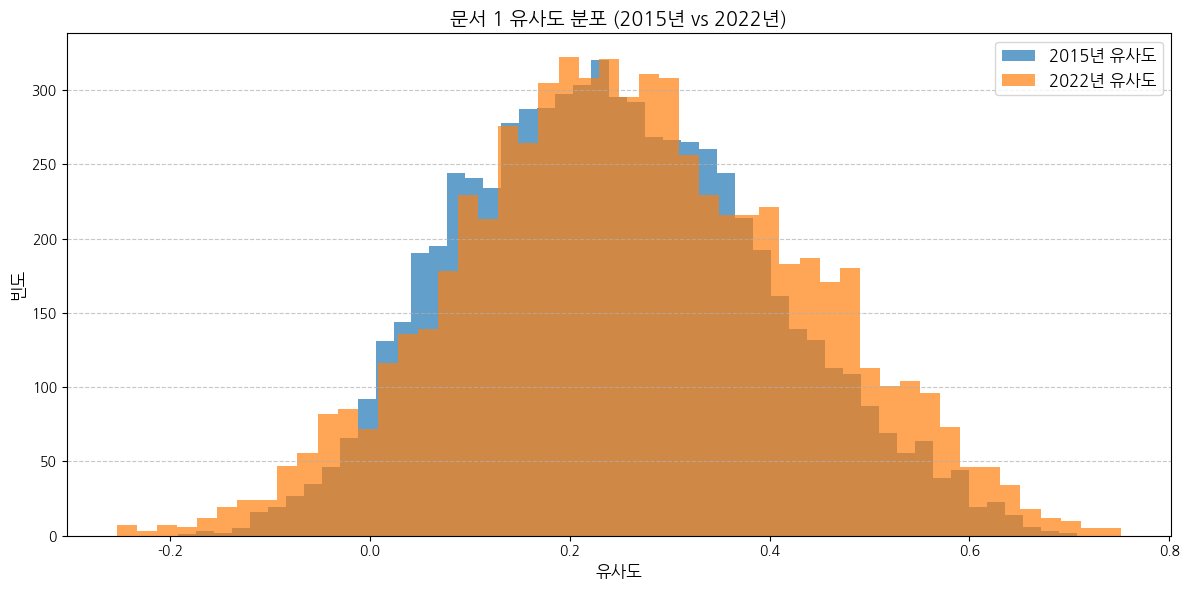

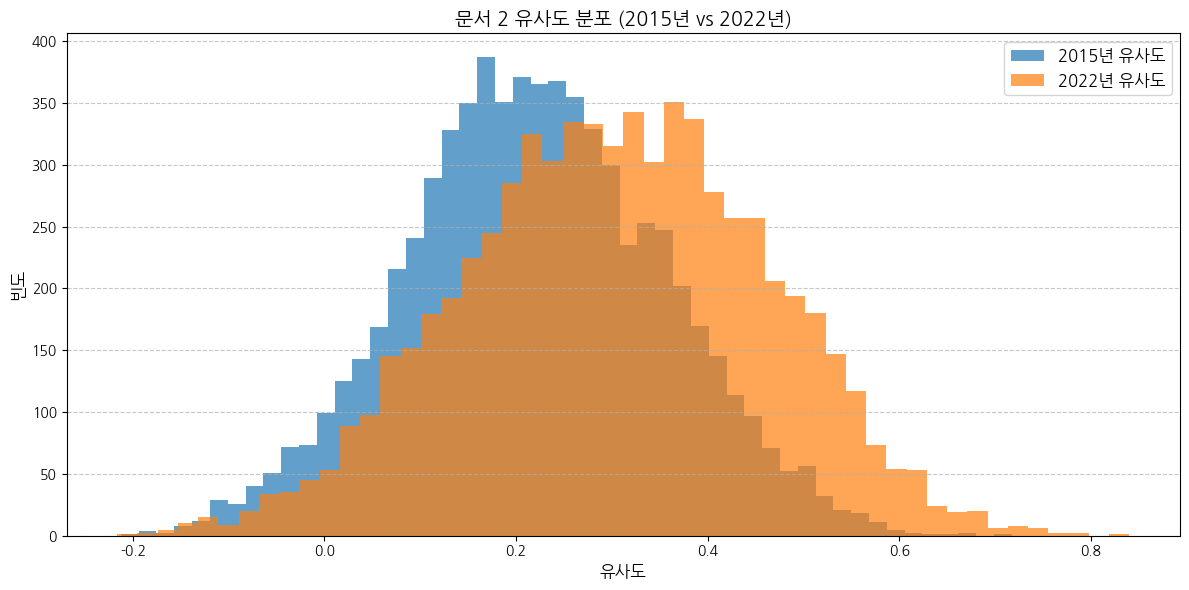

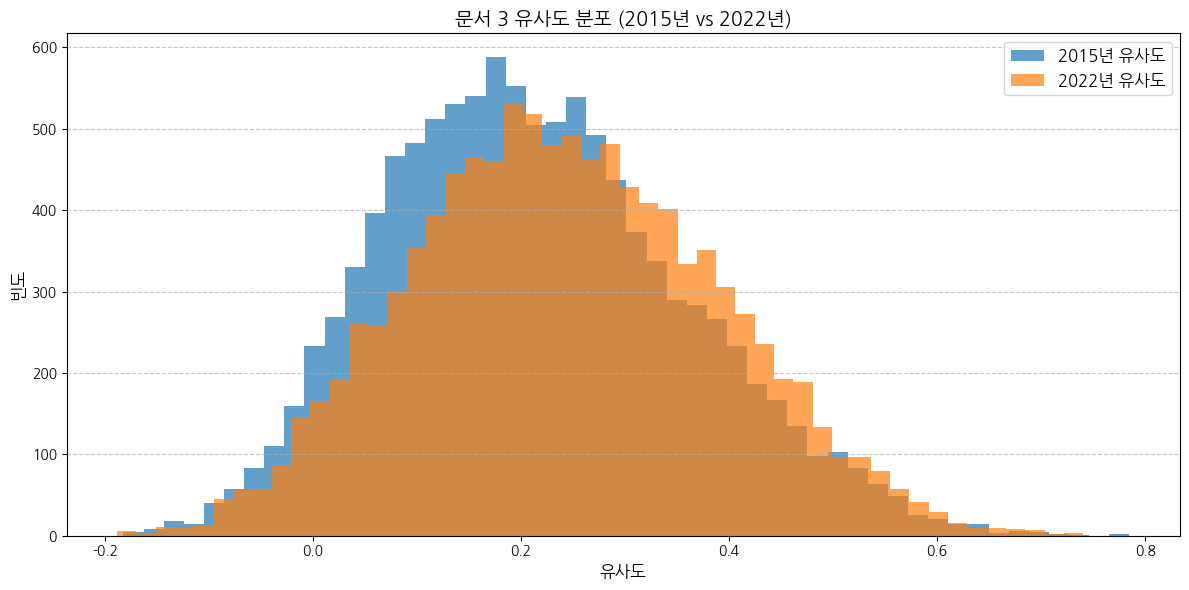

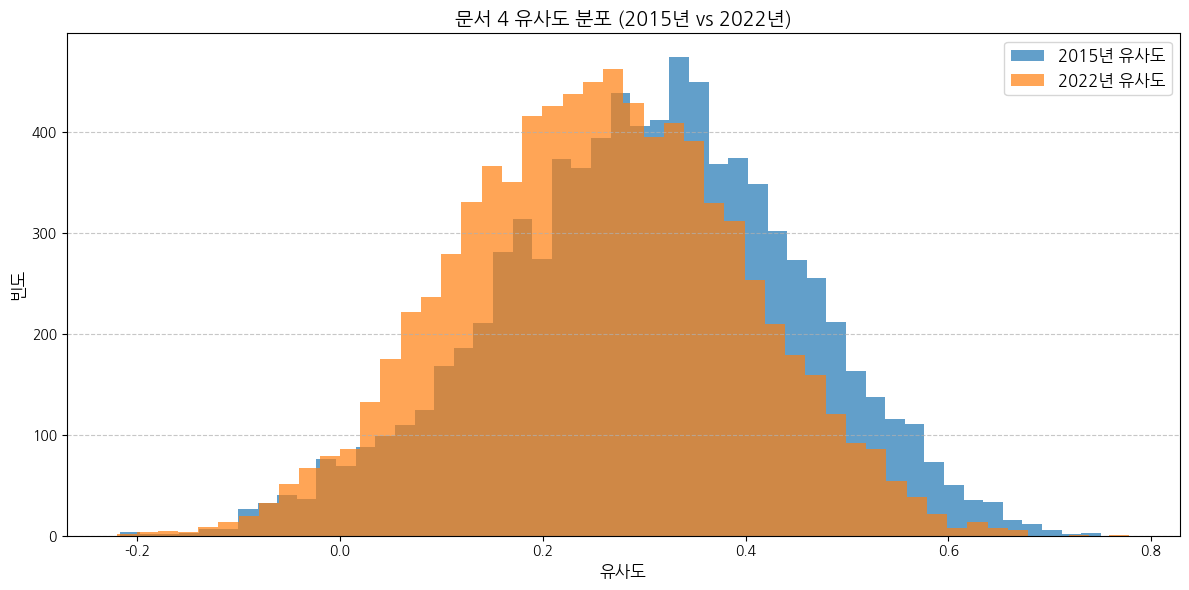

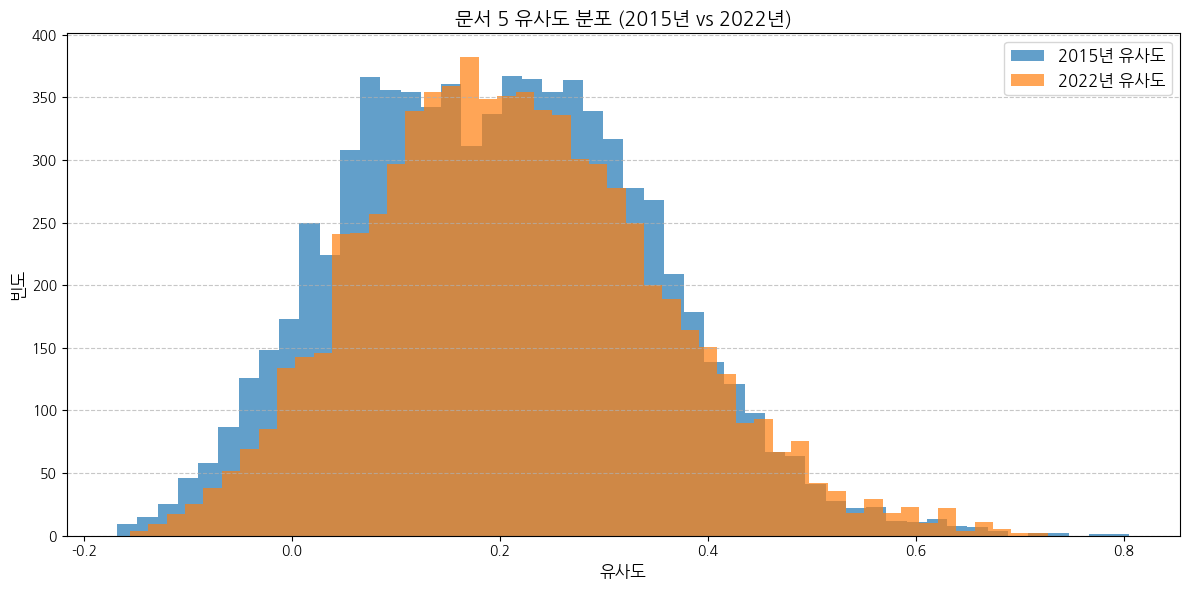

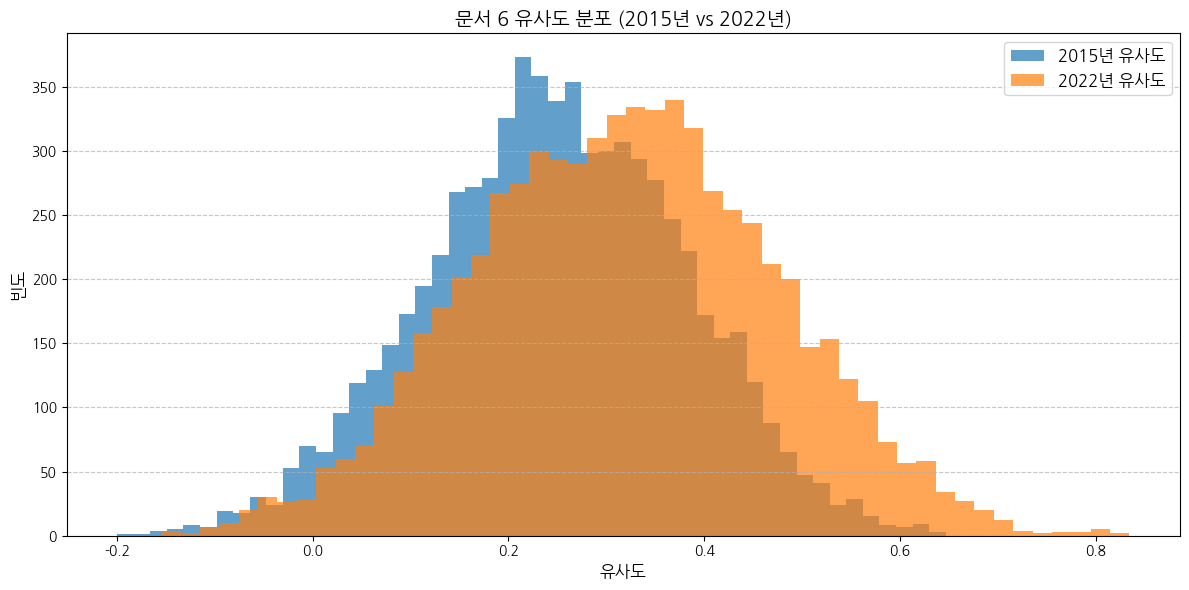

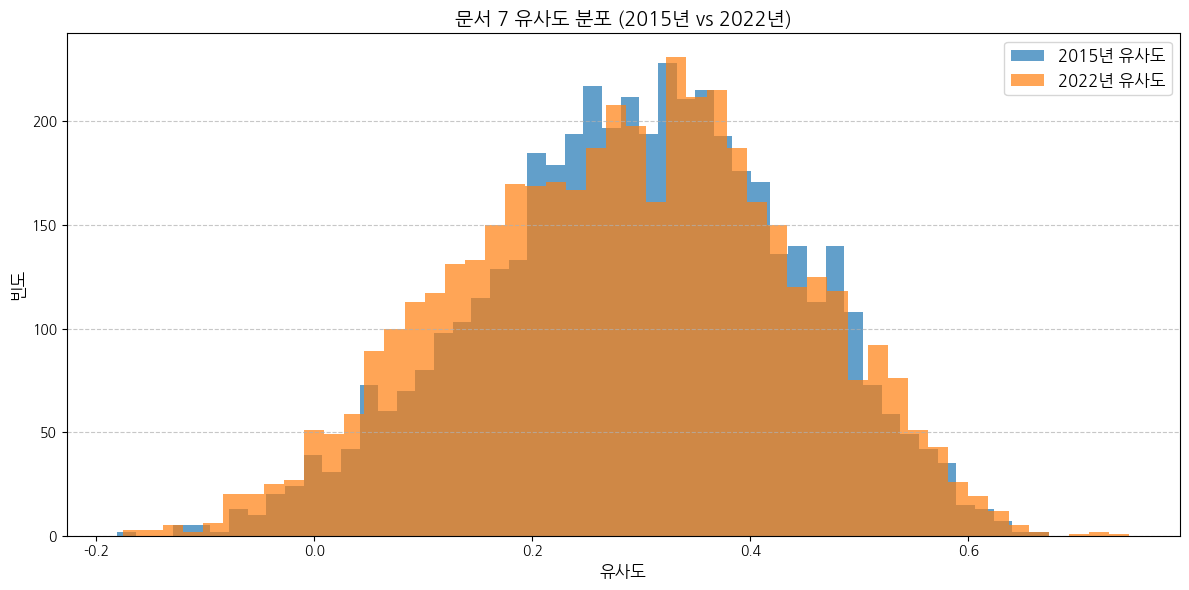

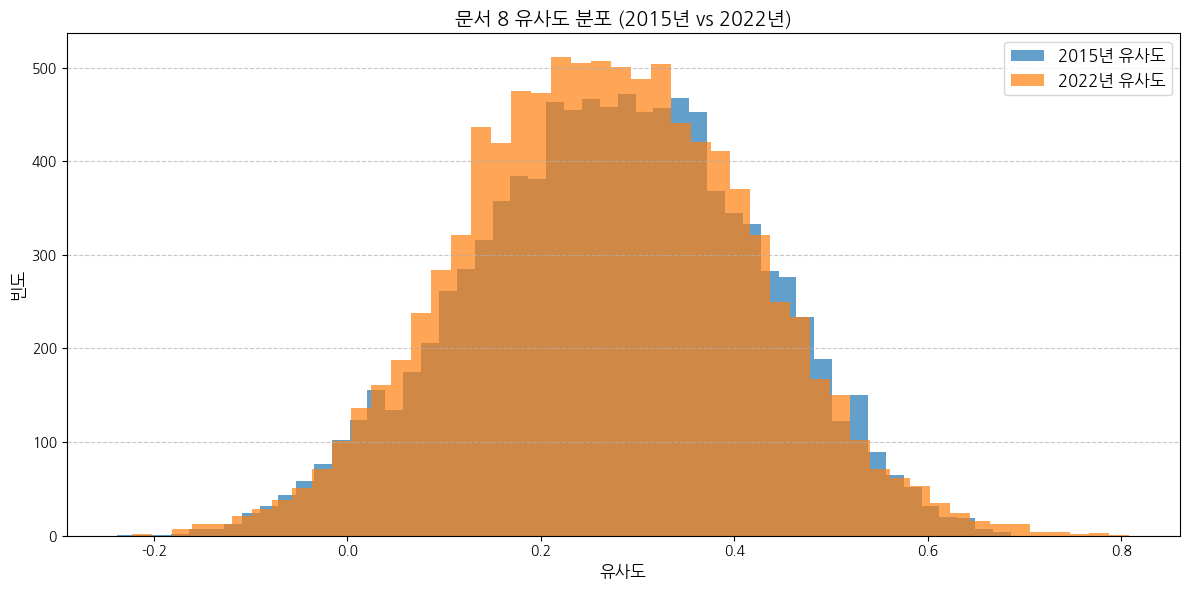

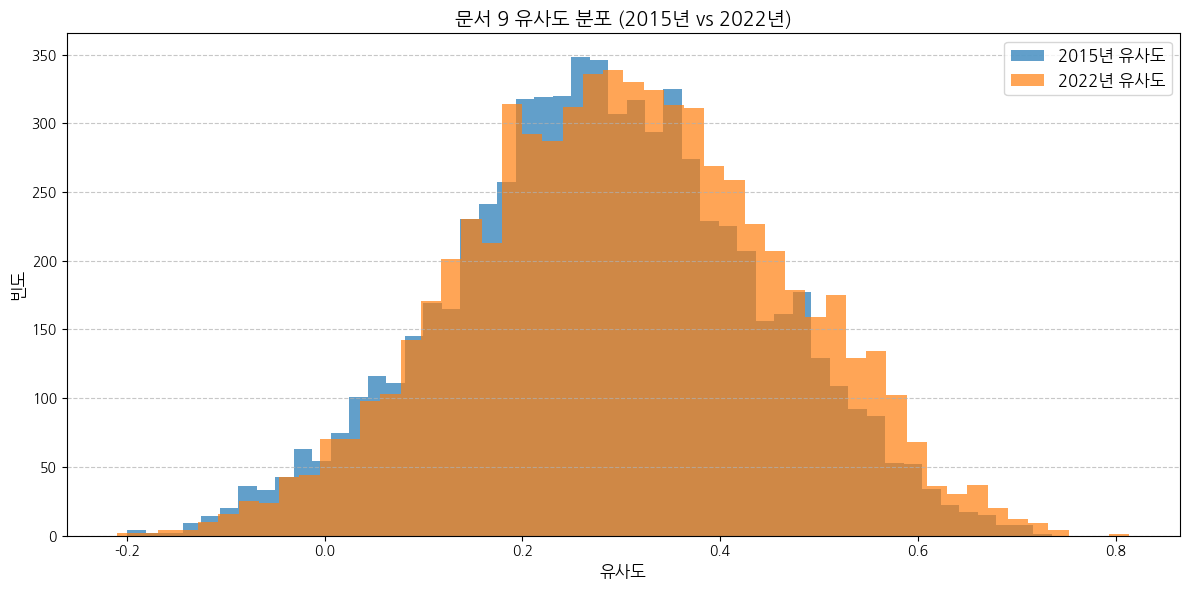

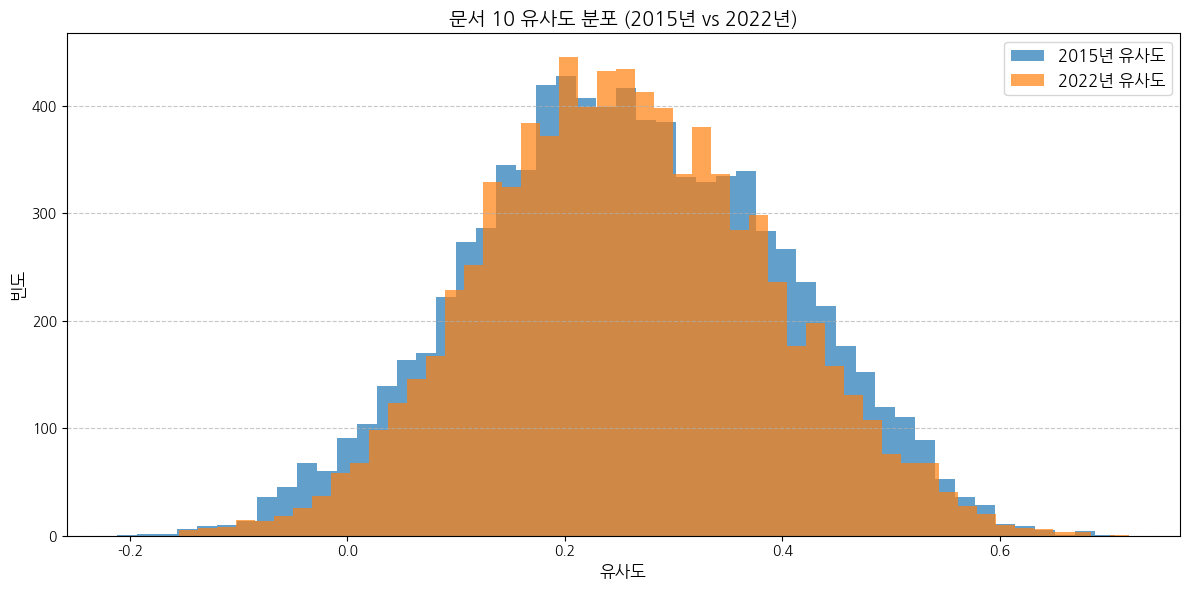

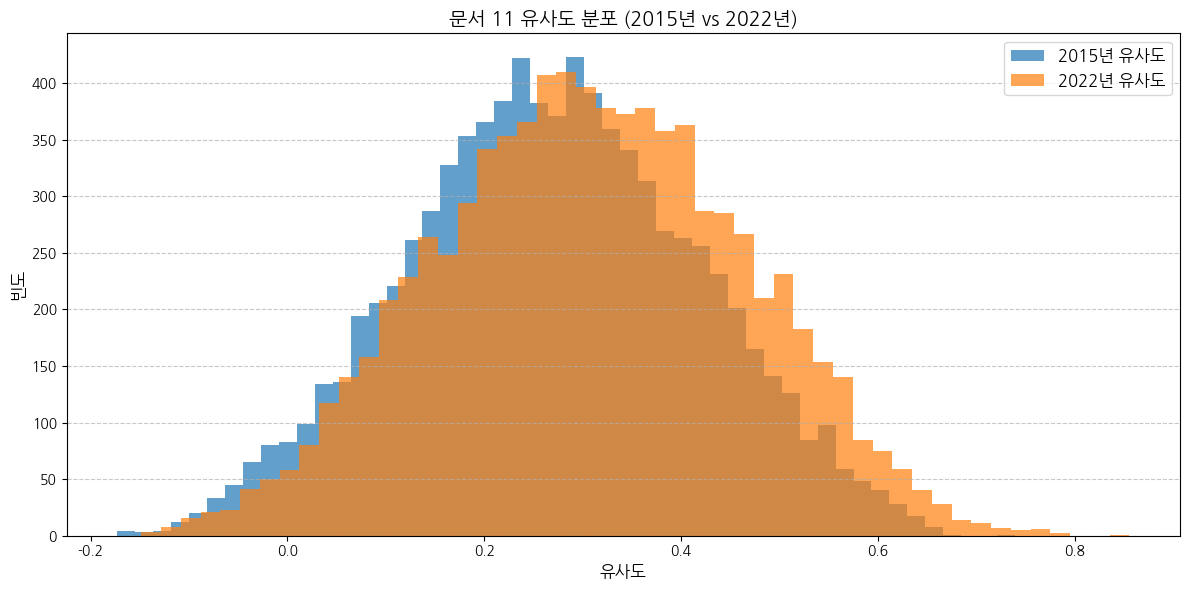

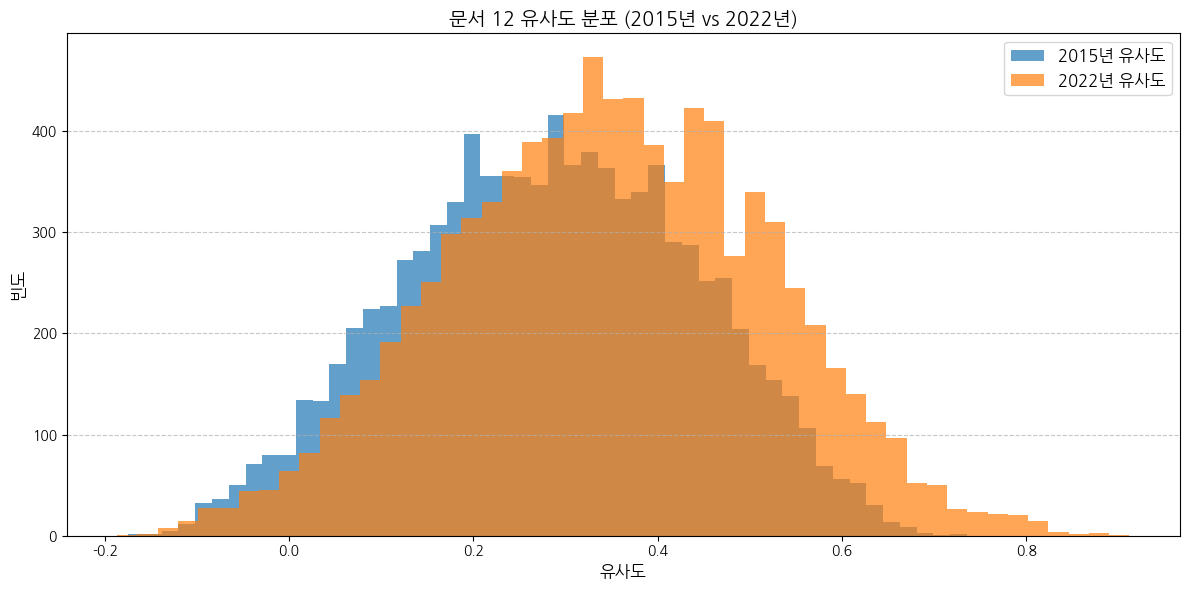

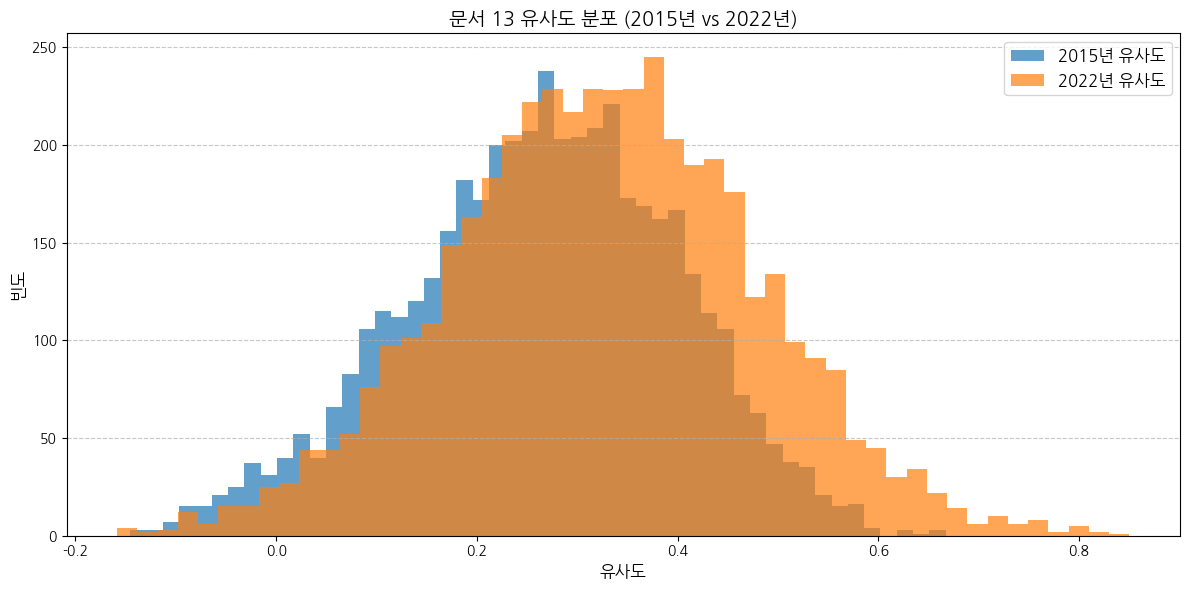

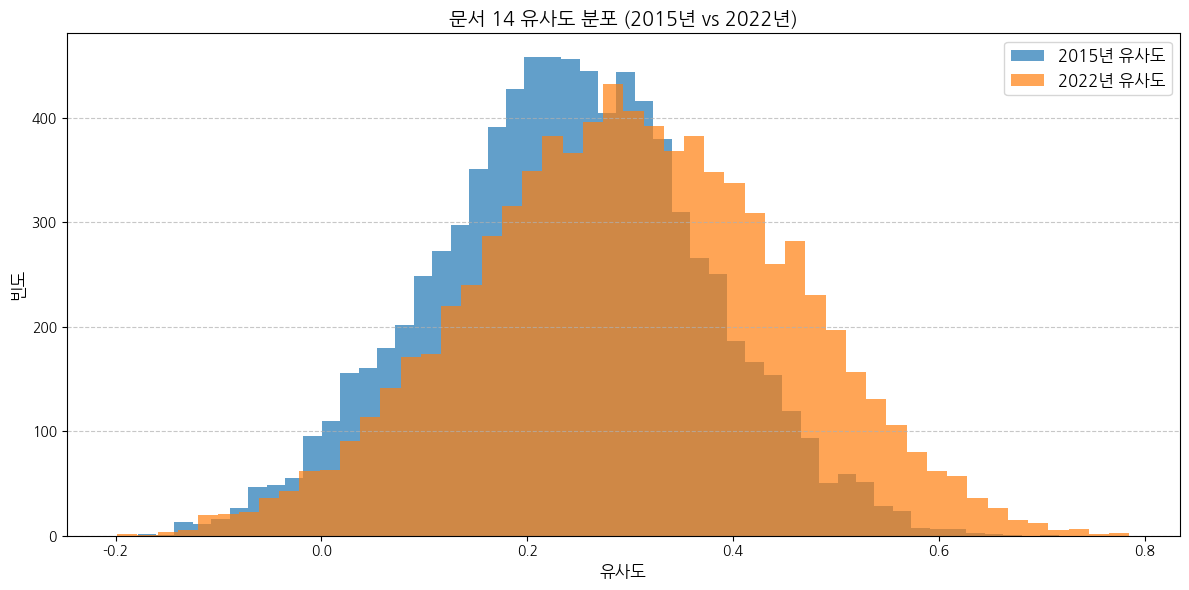

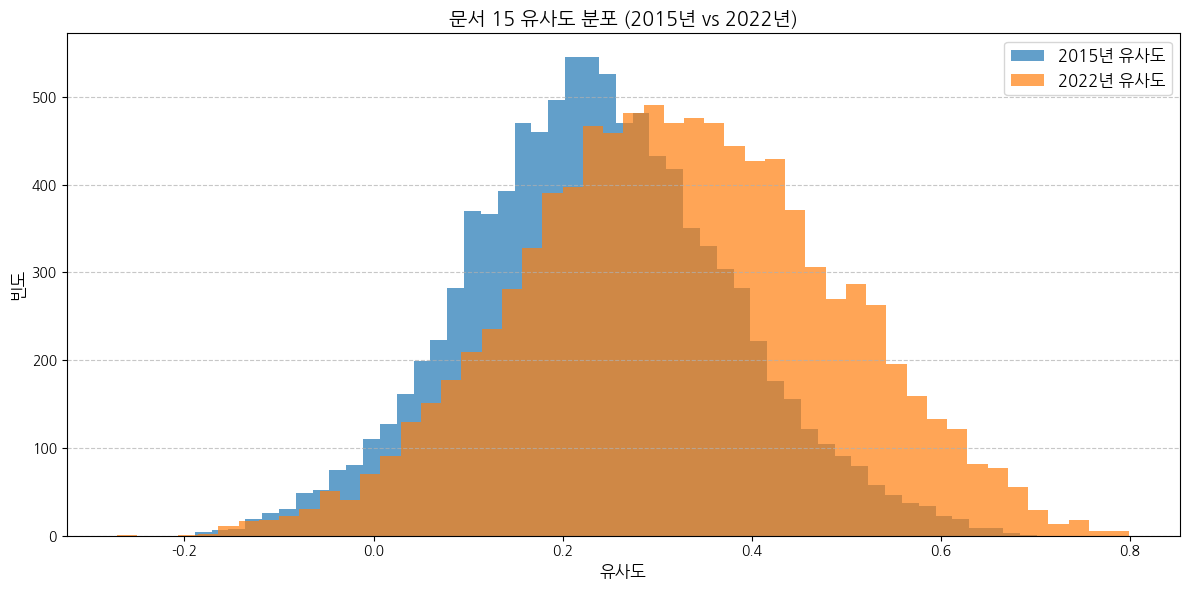

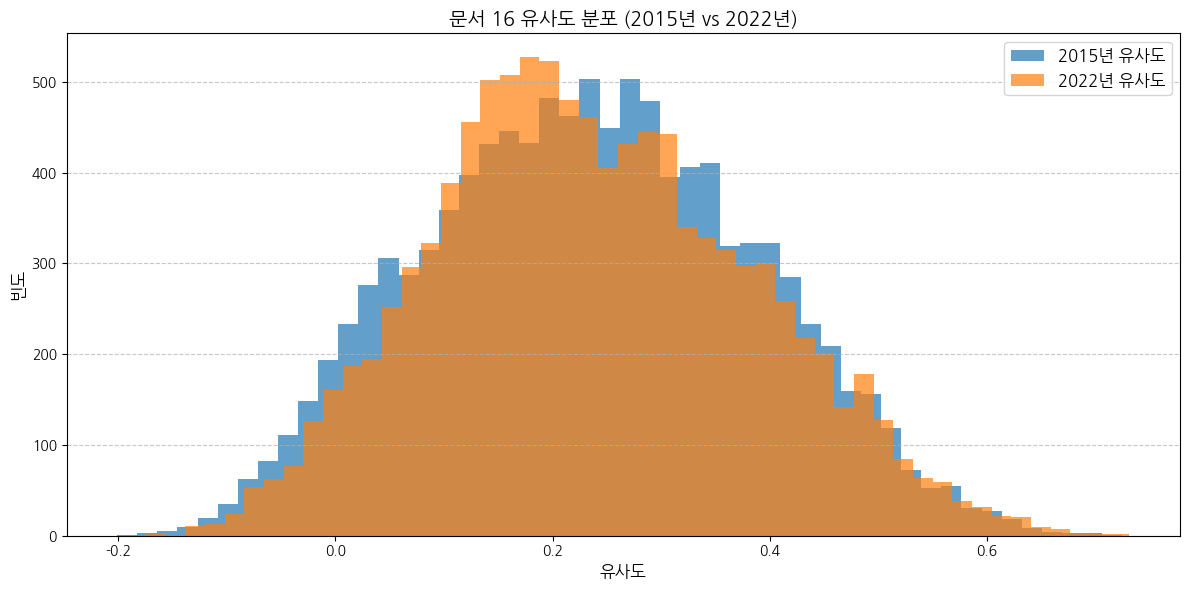

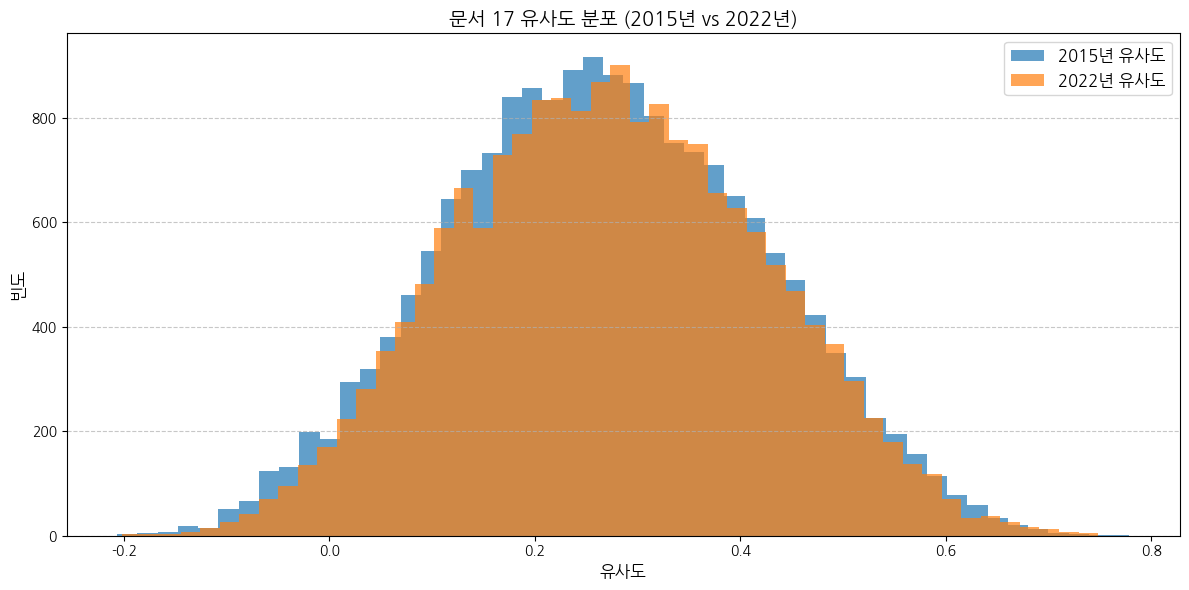

In [ ]:
import matplotlib.pyplot as plt

# 문서별 유사도 히스토그램
for doc, data in similarities_by_document.items():
    plt.figure(figsize=(12, 6))
    plt.hist(data["2015"].flatten().cpu().numpy(), bins=50, alpha=0.7, label="2015년 유사도")
    plt.hist(data["2022"].flatten().cpu().numpy(), bins=50, alpha=0.7, label="2022년 유사도")
    plt.title(f"{doc} 유사도 분포 (2015년 vs 2022년)", fontsize=14, fontweight="bold")
    plt.xlabel("유사도", fontsize=12)
    plt.ylabel("빈도", fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.tight_layout()
    plt.show()


#jhgan/ko-sroberta-multitask


===== 기준서 문서 1 =====

--- 2015년 ---
유사도 통계 - 평균: 0.244, 최소: -0.192, 최대: 0.707, 최빈값: 0.23000000417232513 (빈도: 182)


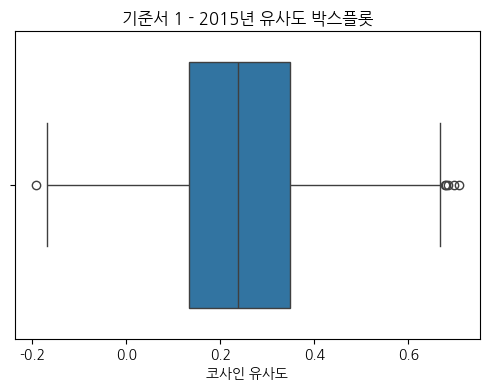

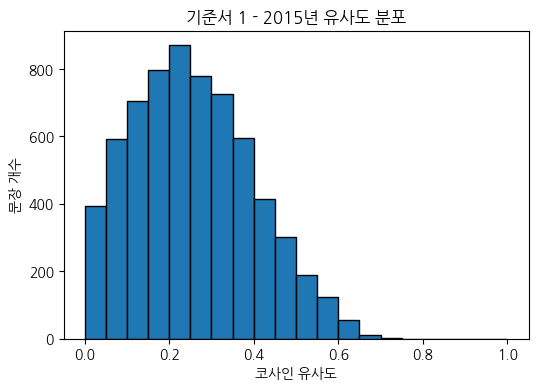


가장 유사한 문장 쌍 (유사도 0.707):
 [기준서 문장]: 개도국 특히 최빈개도국에게 모든 측면에서 빈곤을 종식하기 위한 프로그램과 정책을 이행할 수 있는 적절하고 예측 가능한 수단을 제공하기 위하여 개발 협력 증진 등을 통한 다양한 원천으로부터의 자원의 상당한 동원을 보장한다.
 [연도 문장]: 따라서 생활 자원을 적절히 배분하여 사용함 으로써 자신과 가족의 욕구를 최대한 충족시키고 생활의 질을 향상시킬 수 있도 록 한다.

--- 2022년 ---
유사도 통계 - 평균: 0.262, 최소: -0.254, 최대: 0.752, 최빈값: 0.28999999165534973 (빈도: 172)


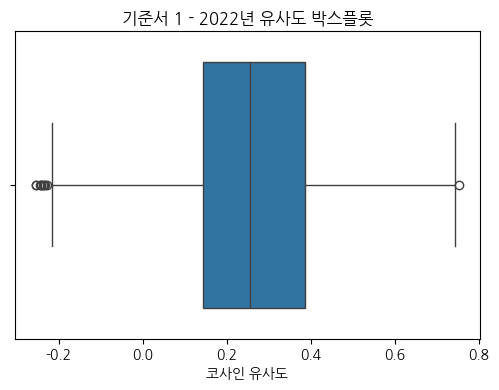

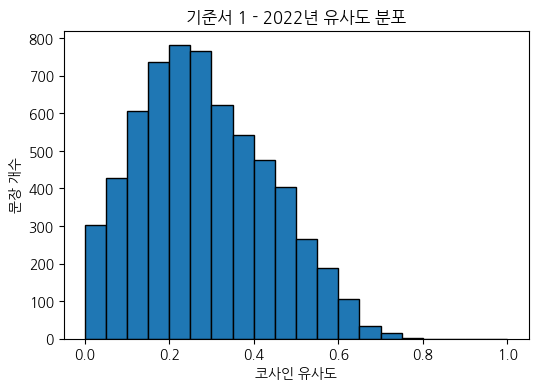


가장 유사한 문장 쌍 (유사도 0.752):
 [기준서 문장]: 년까지 빈곤층과 취약계층의 회복력을 구축하고 극한 기후에 관련된 사건이나 기타 경제 사회 환경적 충격 및 재난에 대한 노출과 취약성을 감소한다.
 [연도 문장]: 그림 그러므로 자원의 낭비를 최소화하고 환경에 미치는 부정적인 영향과 폐기되는 자원을 줄이려고 노력해야 한다.

===== 기준서 문서 2 =====

--- 2015년 ---
유사도 통계 - 평균: 0.219, 최소: -0.212, 최대: 0.717, 최빈값: 0.20000000298023224 (빈도: 213)


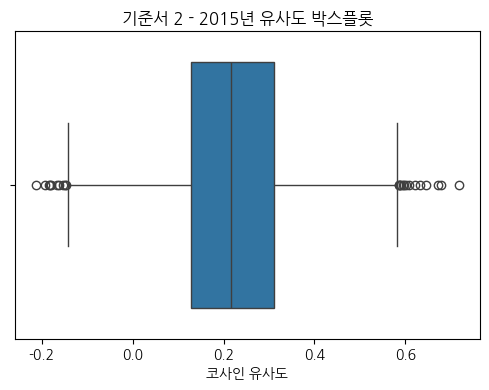

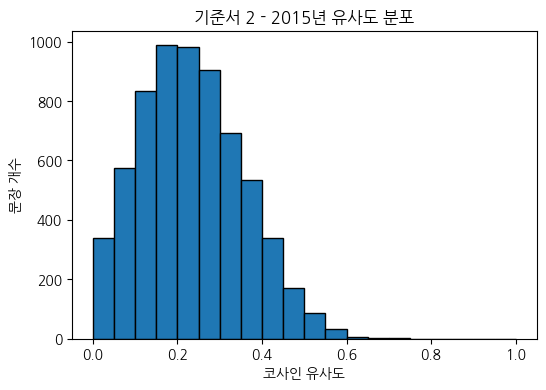


가장 유사한 문장 쌍 (유사도 0.717):
 [기준서 문장]: 년까지 기아를 종식시키고 영유아를 포함한 모든 사람 특히 빈곤층과 취약계층이 연중 안전하고 영양가 있는 충분한 식량에 대한 접근을 보장한다.
 [연도 문장]: 예를 들어 시간이 부족한 사람이라면 돈이라는 물적 자원 을 활용하여 음식을 사 먹어 시간을 절약할 수 있다.

--- 2022년 ---
유사도 통계 - 평균: 0.302, 최소: -0.216, 최대: 0.840, 최빈값: 0.38999998569488525 (빈도: 171)


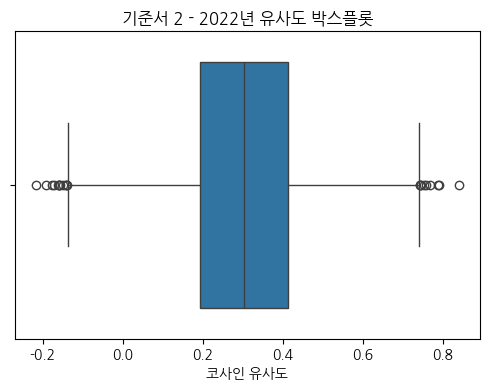

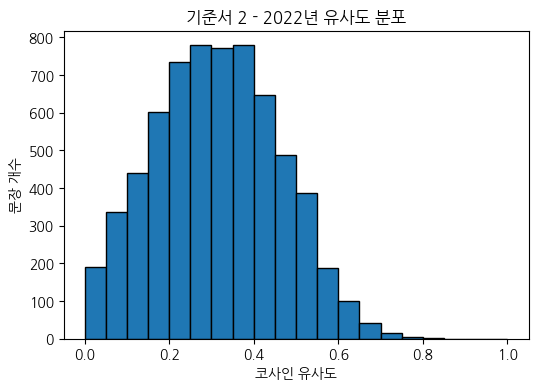


가장 유사한 문장 쌍 (유사도 0.840):
 [기준서 문장]: 식료품 시장 및 파생상품 시장의 적절한 기능을 보장할 수 있는 방안을 채택하고 과도한 식량가격의 변동성을 제한할 수 있도록 식량 저장과 같은 시장 정보에의 적시 접근을 원활하게하기 위한 조치를 채택한다.
 [연도 문장]: 식품의 알맞은 보관 방법을 통해 음식물 쓰레기 발생을 줄인다.

===== 기준서 문서 3 =====

--- 2015년 ---
유사도 통계 - 평균: 0.213, 최소: -0.182, 최대: 0.785, 최빈값: 0.18000000715255737 (빈도: 315)


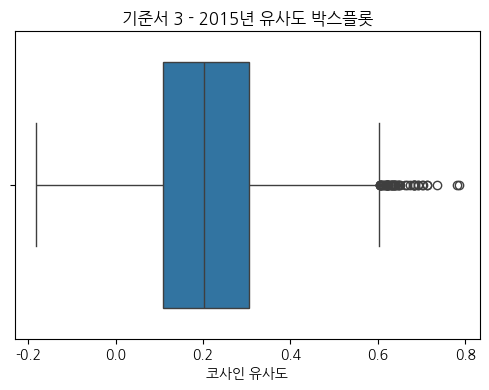

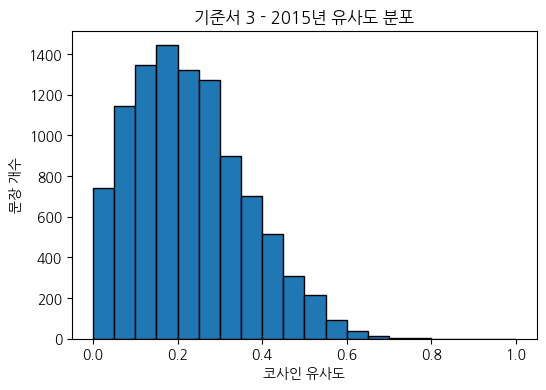


가장 유사한 문장 쌍 (유사도 0.785):
 [기준서 문장]: 모든 연령층을 위한 건강한 삶 보장과 웰빙 증진 .
 [연도 문장]: .생활자원의 특성 위와 같이 우리의 생명과 건강을 유지하고 욕구를 충족하며 목표를 이루기 위해 사용하는 모든 자원을 생활 자원이라고 한다.

--- 2022년 ---
유사도 통계 - 평균: 0.243, 최소: -0.188, 최대: 0.740, 최빈값: 0.2199999988079071 (빈도: 293)


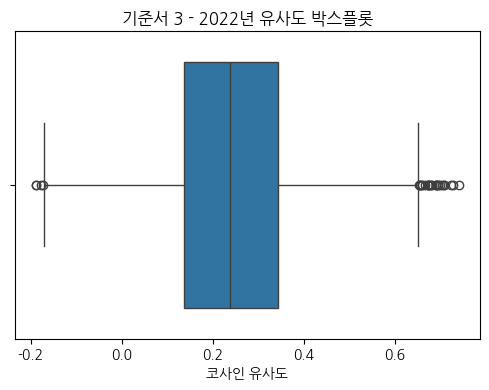

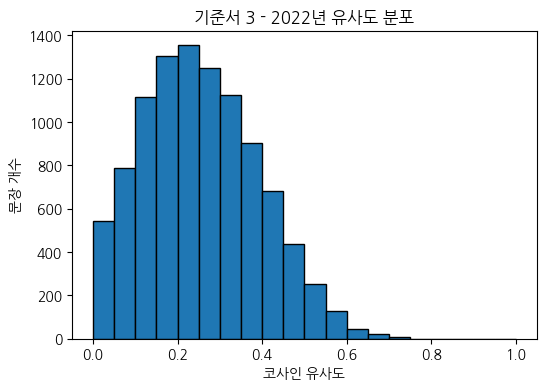


가장 유사한 문장 쌍 (유사도 0.740):
 [기준서 문장]: 년까지 유해 화학물질 대기 수질 토지 공해 및 오염으로 인한 사망과 질병 건수를 상당히 감소한다.
 [연도 문장]: 쓰레기를 줄여 낭비되는 자원을 줄이고 오염 물질을 최소화하는 것을 의미한다.

===== 기준서 문서 4 =====

--- 2015년 ---
유사도 통계 - 평균: 0.302, 최소: -0.217, 최대: 0.751, 최빈값: 0.33000001311302185 (빈도: 245)


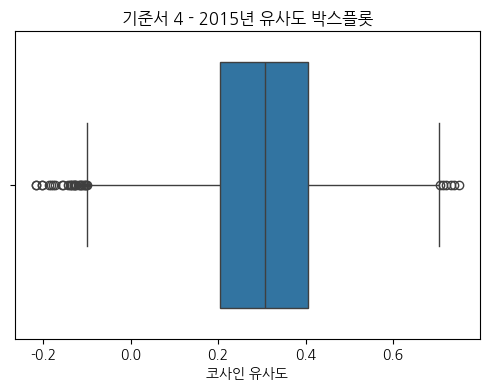

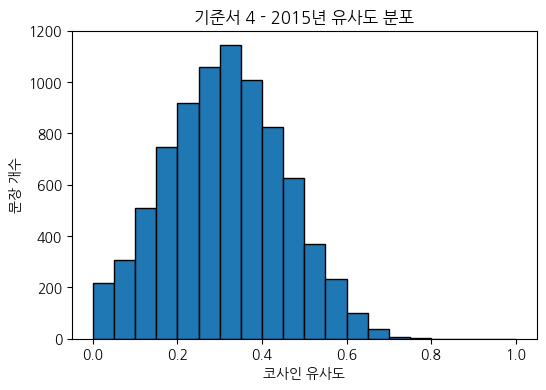


가장 유사한 문장 쌍 (유사도 0.751):
 [기준서 문장]: 년까지 취업 양질의 일자리 창업 활동에 필요한 전문 직업 기술 등 적합한 기술을 지닌 청소년과 성인의 수를 실질적으로 늘린다.
 [연도 문장]: 청소년의 자원 관리 청소년의 학업 관리 관리 청소년기는 일상생활을 위한 기본적 지식과 향후 진학과 진로를 결정하는 데 필요한 전문 적 지식을 함양하는 매우 중요한 시기이다.

--- 2022년 ---
유사도 통계 - 평균: 0.254, 최소: -0.220, 최대: 0.779, 최빈값: 0.25999999046325684 (빈도: 246)


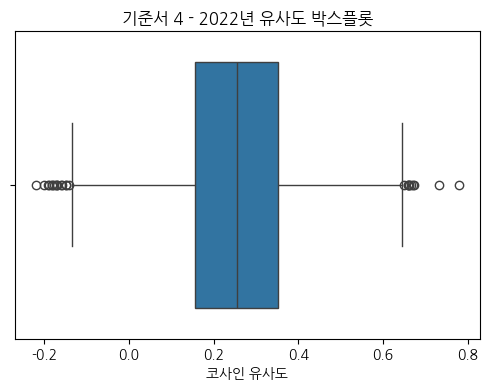

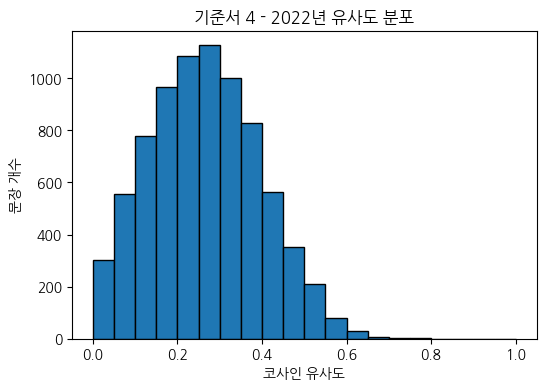


가장 유사한 문장 쌍 (유사도 0.779):
 [기준서 문장]: 년까지 취업 양질의 일자리 창업 활동에 필요한 전문 직업 기술 등 적합한 기술을 지닌 청소년과 성인의 수를 실질적으로 늘린다.
 [연도 문장]: 인적 자원 계발하기 꾸준한 노력으로 지식 기술 창의력 등의 인적 자원을 늘린다.

===== 기준서 문서 5 =====

--- 2015년 ---
유사도 통계 - 평균: 0.198, 최소: -0.168, 최대: 0.805, 최빈값: 0.07999999821186066 (빈도: 220)


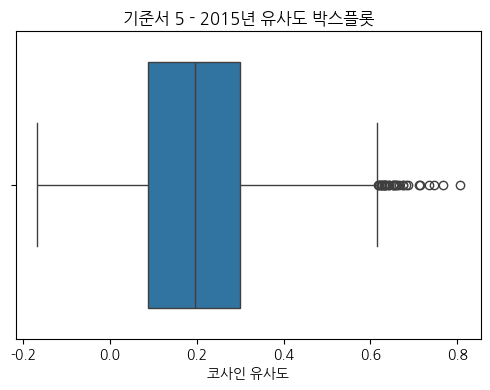

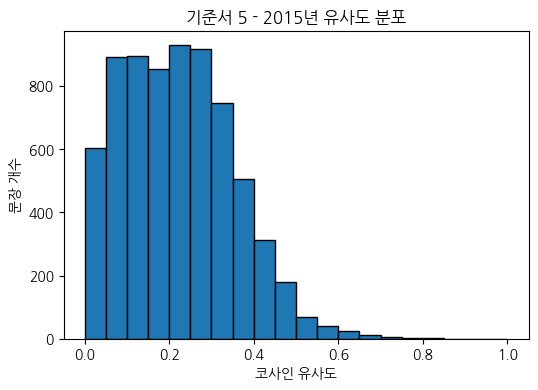


가장 유사한 문장 쌍 (유사도 0.805):
 [기준서 문장]: 공공서비스 사회기반시설 및 사회적 보호정책을 제공하고 국가별로 적절하게 가구와 가족 내에서의 책임 분담을 증진함으로써 무상 돌봄과 가사노동을 인정하고 가치 있게 인식한다.
 [연도 문장]: 생활 자원의 특성 생활 자원이란 나와 가족의 욕구를 충족시키고 목표를 달성하는 데 활용할 수 있는 수단과 방법이다.

--- 2022년 ---
유사도 통계 - 평균: 0.215, 최소: -0.156, 최대: 0.727, 최빈값: 0.17000000178813934 (빈도: 232)


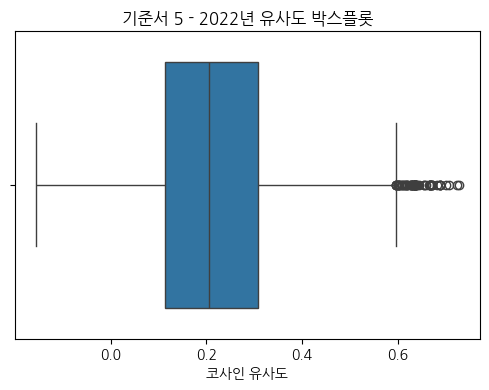

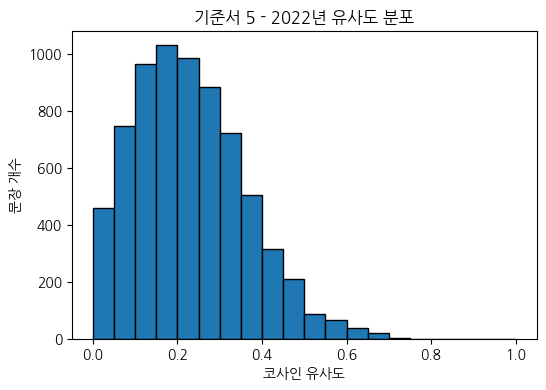


가장 유사한 문장 쌍 (유사도 0.727):
 [기준서 문장]: 공공서비스 사회기반시설 및 사회적 보호정책을 제공하고 국가별로 적절하게 가구와 가족 내에서의 책임 분담을 증진함으로써 무상 돌봄과 가사노동을 인정하고 가치 있게 인식한다.
 [연도 문장]: 그중 일상생활에서 나와 가족의 욕구를 충족하고 목표를 달성하기 위해 활용 할 수 있는 모든 수단이나 방법을 생활 자원이라고 한다.

===== 기준서 문서 6 =====

--- 2015년 ---
유사도 통계 - 평균: 0.248, 최소: -0.200, 최대: 0.647, 최빈값: 0.2199999988079071 (빈도: 240)


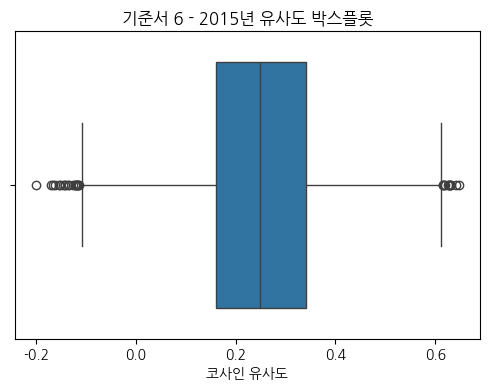

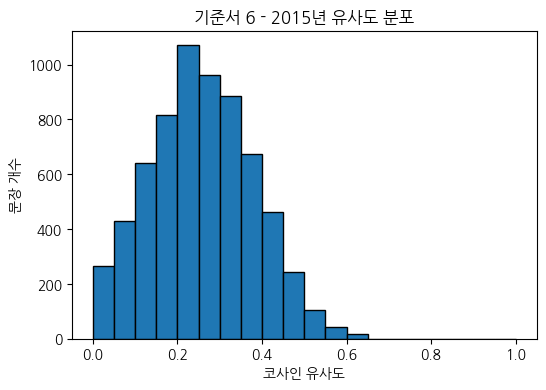


가장 유사한 문장 쌍 (유사도 0.647):
 [기준서 문장]: 년까지 집수 담수화 물 효율성 폐수처리 재활용 및 재사용 기술을 포함하는 물과 위생 관련 활동과 프로그램에 있어 개도국 역량 강화 지원과 국제적 협력을 확대한다.
 [연도 문장]: 생 생 활 여 리 물 가 모 적 정 기 선 달 물 인 력 장 시 물 목 차 표 적 물 간 할 일 목 록 노 동 리 평 가 관 생 여 가 치 장 활 산 정 적 자 원 선 지 간 원 실 순 정 복 지 행 위 가 청 소 적 자 원 디 자 년 자 원 관 리 와 자 나와 가족의 욕구를 충족시키고 목표를 달성하는 데 활용할 수 있는 수단과 방법 립 개인이 가진 특성이나 능력에 관련된 자원으로 노력에 따라 높은 수준으로 발전할 수 있는 자원 양과 질을 쉽게 측정할 수 있는 생활 자원 생활하는 데 필요한 에너지를 생산하고 건강한 생명을 유지하는 데 필요한 시간을 생활시간이라고 한다.

--- 2022년 ---
유사도 통계 - 평균: 0.318, 최소: -0.155, 최대: 0.834, 최빈값: 0.3499999940395355 (빈도: 182)


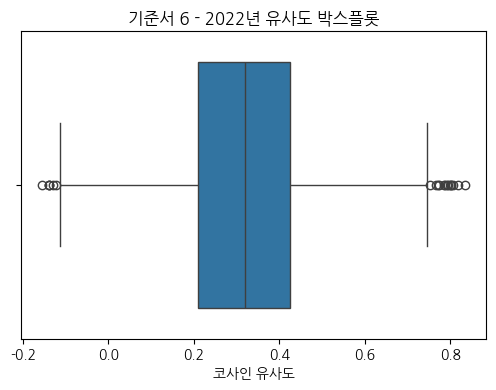

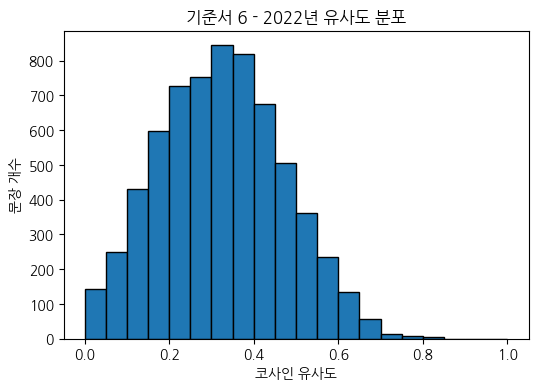


가장 유사한 문장 쌍 (유사도 0.834):
 [기준서 문장]: 년까지 오염 저감 유해물질의 투기 근절과 배출 최소화 미처리 폐수 비율 반감 전 세계에서 재활용과 안전한 재사용의 대폭 증진을 통해 수질을 개선한다.
 [연도 문장]: 환경을 위한 노력 친환경 해체 기술을 적용하여 환경 오염 을 최소화한다.

===== 기준서 문서 7 =====

--- 2015년 ---
유사도 통계 - 평균: 0.297, 최소: -0.181, 최대: 0.675, 최빈값: 0.33000001311302185 (빈도: 134)


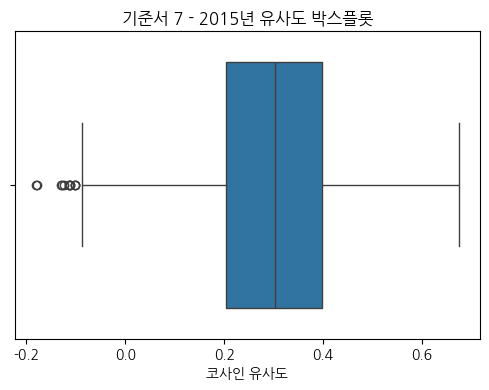

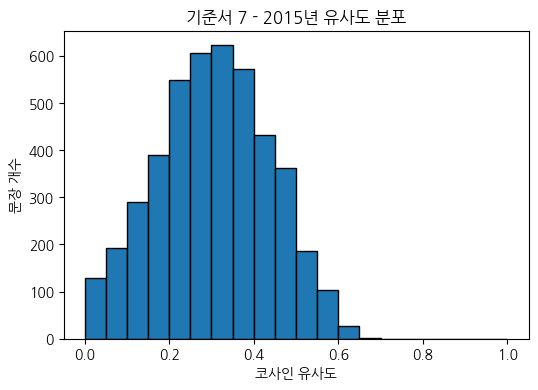


가장 유사한 문장 쌍 (유사도 0.675):
 [기준서 문장]: 년까지 개도국 특히 최빈개도국 군소도서개도국 및 내륙개도국에서 각국의 지원 프로그램에 따라 모두를 위한 현대적이고 지속가능한 에너지 서비스를 공급하기 위한 기반시설을 확대하고 기술을 개선한다.
 [연도 문장]: 인적 자원을 최대한 것 지식 기술 창의력 판단력 등의 인적 자원을 꾸준히 개발하여 활용한다.

--- 2022년 ---
유사도 통계 - 평균: 0.285, 최소: -0.176, 최대: 0.748, 최빈값: 0.28999999165534973 (빈도: 132)


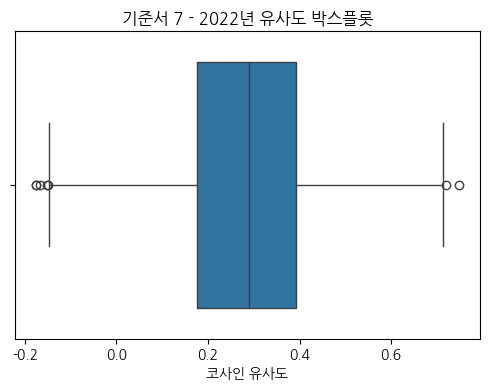

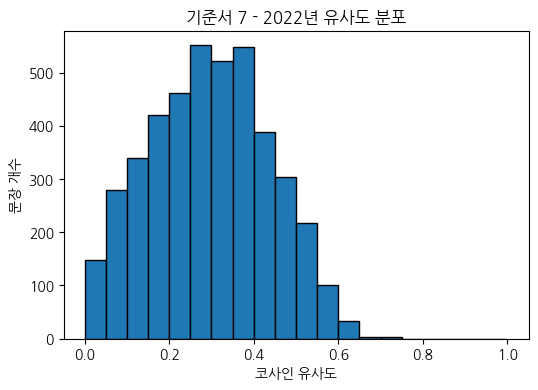


가장 유사한 문장 쌍 (유사도 0.748):
 [기준서 문장]: 년까지 개도국 특히 최빈개도국 군소도서개도국 및 내륙개도국에서 각국의 지원 프로그램에 따라 모두를 위한 현대적이고 지속가능한 에너지 서비스를 공급하기 위한 기반시설을 확대하고 기술을 개선한다.
 [연도 문장]: 인적 자원 계발하기 꾸준한 노력으로 지식 기술 창의력 등의 인적 자원을 늘린다.

===== 기준서 문서 8 =====

--- 2015년 ---
유사도 통계 - 평균: 0.274, 최소: -0.238, 최대: 0.686, 최빈값: 0.3400000035762787 (빈도: 272)


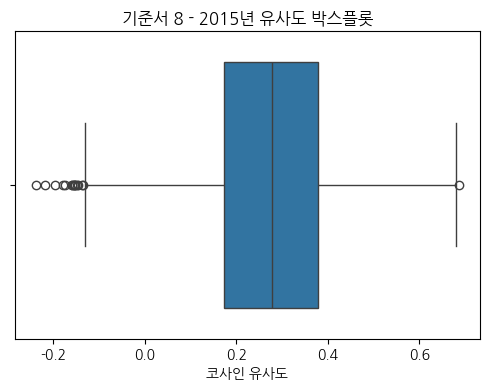

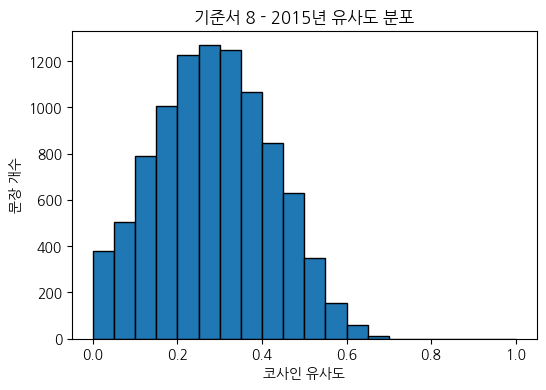


가장 유사한 문장 쌍 (유사도 0.686):
 [기준서 문장]: 년까지 청년 고용을 위한 글로벌 전략을 개발하고 운영하며 국제노동 기구 세계고용협약 을 이행한다.
 [연도 문장]: 청소년의 자원 관리 청소년의 학업 관리 관리 청소년기는 일상생활을 위한 기본적 지식과 향후 진학과 진로를 결정하는 데 필요한 전문 적 지식을 함양하는 매우 중요한 시기이다.

--- 2022년 ---
유사도 통계 - 평균: 0.267, 최소: -0.223, 최대: 0.808, 최빈값: 0.2199999988079071 (빈도: 258)


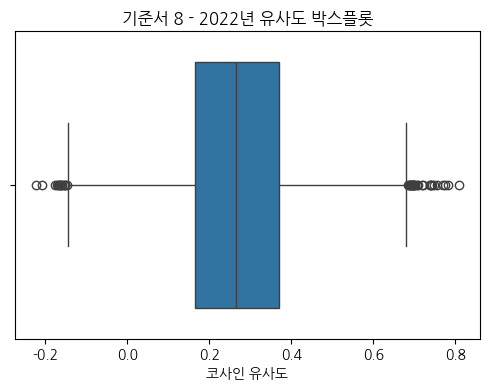

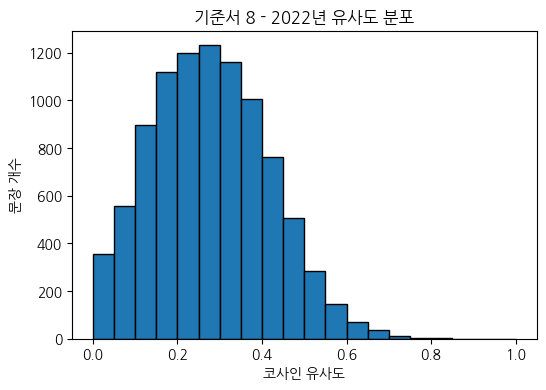


가장 유사한 문장 쌍 (유사도 0.808):
 [기준서 문장]: 지속가능한 소비와 생산에 관한 개년 계획에 따라 선진국들이 주도하여 소비와 생산에 있어서의 전 세계적인 자원 효율성을 년까지 점진적으로 개선하고 경제성장을 환경 악화로부터 분리시키도록 노력한다.
 [연도 문장]: 기대하는 목표 세우기 환경 오염과 기후 위기를 극복할 수 있도록 의식주 생활 자원을 선택할 때 기대하는 목표를 세워 보자.

===== 기준서 문서 9 =====

--- 2015년 ---
유사도 통계 - 평균: 0.282, 최소: -0.199, 최대: 0.735, 최빈값: 0.25999999046325684 (빈도: 194)


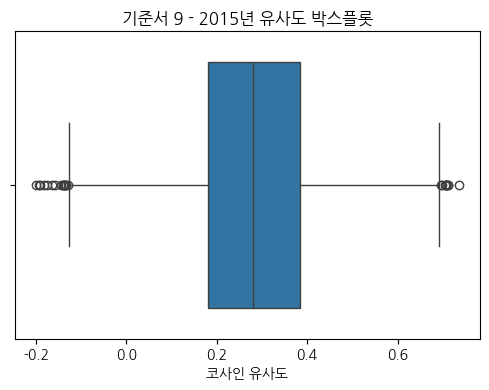

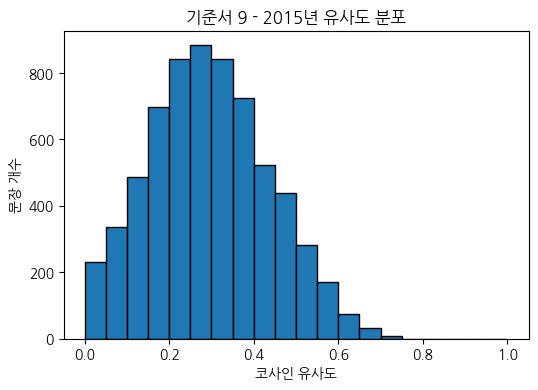


가장 유사한 문장 쌍 (유사도 0.735):
 [기준서 문장]: 모두를 위한 적정가격의 공평한 접근에 중점을 두고 경제발전과 인류의 웰빙을 지원하기 위해 지역별 및 초국경 사회기반시설을 포함하여 양질의 신뢰할 수 있고 지속가능하며 복원력 있는 사회기반시설을 구축한다.
 [연도 문장]: 따라서 생활 자원을 적절히 배분하여 사용함 으로써 자신과 가족의 욕구를 최대한 충족시키고 생활의 질을 향상시킬 수 있도 록 한다.

--- 2022년 ---
유사도 통계 - 평균: 0.303, 최소: -0.210, 최대: 0.814, 최빈값: 0.30000001192092896 (빈도: 175)


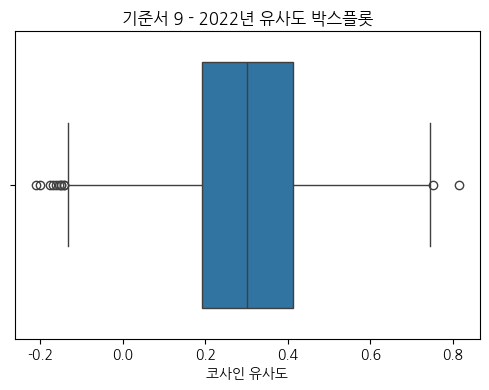

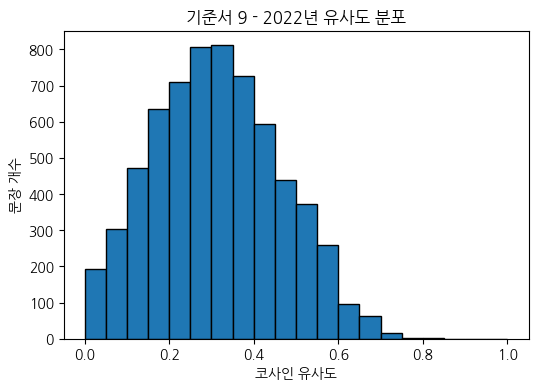


가장 유사한 문장 쌍 (유사도 0.814):
 [기준서 문장]: 모두를 위한 적정가격의 공평한 접근에 중점을 두고 경제발전과 인류의 웰빙을 지원하기 위해 지역별 및 초국경 사회기반시설을 포함하여 양질의 신뢰할 수 있고 지속가능하며 복원력 있는 사회기반시설을 구축한다.
 [연도 문장]: 그 러므로 의식주 자원을 관리할 때 인간의 욕구 충족 및 목표 달성이라는 가치와 환 경 보전이라는 가치가 서로 적절히 조화를 이룰 수 있도록 해야 한다.

===== 기준서 문서 10 =====

--- 2015년 ---
유사도 통계 - 평균: 0.257, 최소: -0.212, 최대: 0.706, 최빈값: 0.23999999463558197 (빈도: 238)


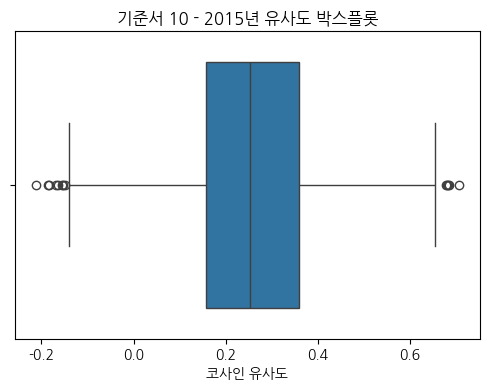

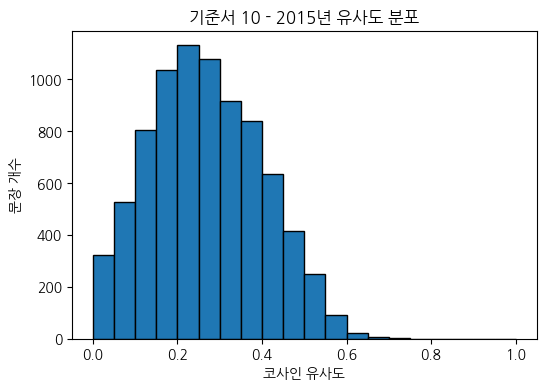


가장 유사한 문장 쌍 (유사도 0.706):
 [기준서 문장]: 계획되고 잘 관리된 이주정책 이행 등을 통하여 질서 있고 안전하며 정기적이고 책임감 있는 이주와 사람의 이동을 촉진한다.
 [연도 문장]: 따라서 합리적인 계획과 실천을 통해 자신의 생활을 효율적으로 관리하고 미래의 인생을 설계 하고 준비할 수 있도록 한다.

--- 2022년 ---
유사도 통계 - 평균: 0.257, 최소: -0.155, 최대: 0.719, 최빈값: 0.23000000417232513 (빈도: 254)


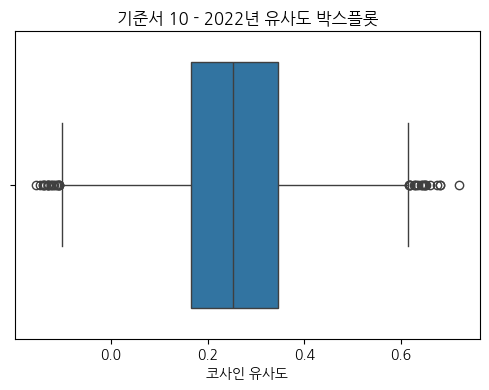

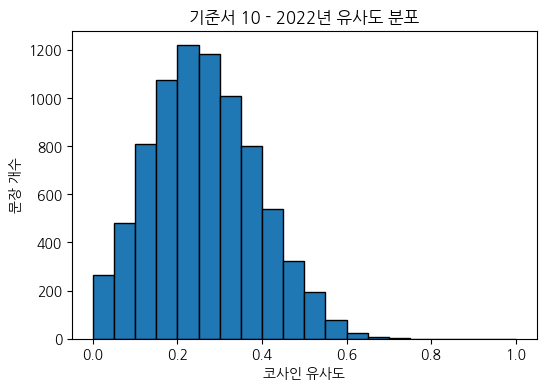


가장 유사한 문장 쌍 (유사도 0.719):
 [기준서 문장]: 계획되고 잘 관리된 이주정책 이행 등을 통하여 질서 있고 안전하며 정기적이고 책임감 있는 이주와 사람의 이동을 촉진한다.
 [연도 문장]: 생활 자원의 순환 과정을 이해하고 생활 자원을 효율적으로 관리할 수 있다.

===== 기준서 문서 11 =====

--- 2015년 ---
유사도 통계 - 평균: 0.269, 최소: -0.173, 최대: 0.740, 최빈값: 0.28999999165534973 (빈도: 250)


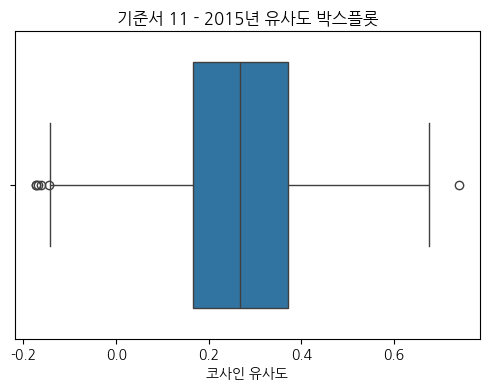

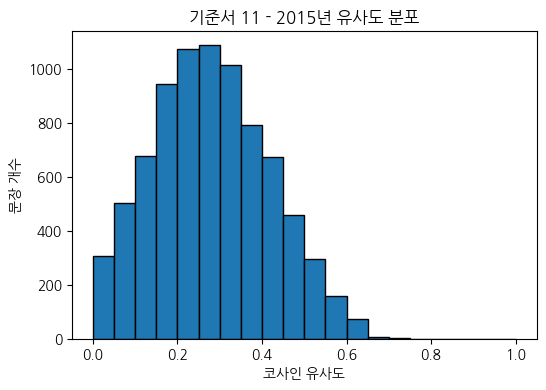


가장 유사한 문장 쌍 (유사도 0.740):
 [기준서 문장]: 년까지 모두를 위한 적절하고 안전한 적정가격의 주택 및 기초서비스에 대한 접근을 보장하고 빈민가 환경을 개선한다.
 [연도 문장]: 따라서 생활 자원을 적절히 배분하여 사용함 으로써 자신과 가족의 욕구를 최대한 충족시키고 생활의 질을 향상시킬 수 있도 록 한다.

--- 2022년 ---
유사도 통계 - 평균: 0.308, 최소: -0.148, 최대: 0.856, 최빈값: 0.25999999046325684 (빈도: 220)


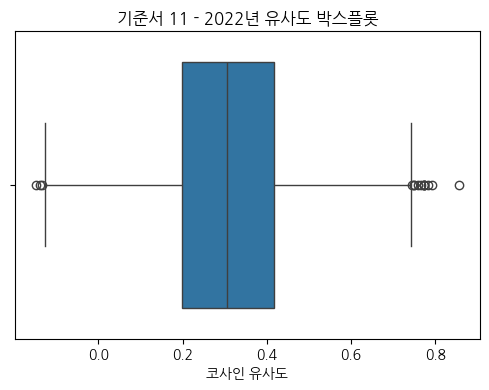

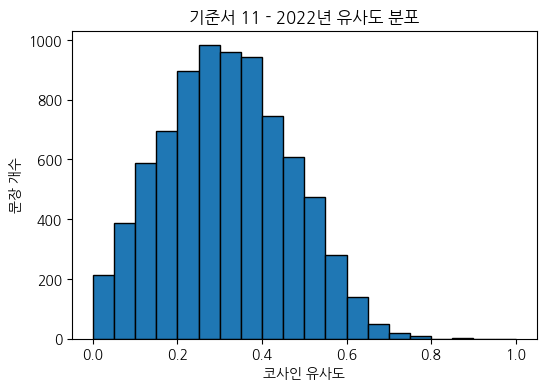


가장 유사한 문장 쌍 (유사도 0.856):
 [기준서 문장]: 년까지 대기질 도시생활 폐기물 및 기타 폐기물 관리에 특별한 주의를 기울임으로써 도시의 인당 부정적 환경영향을 줄인다.
 [연도 문장]: 쓰레기 배출량을 에 가깝게 줄여 환경을 보호하는 실천 운동이지.

===== 기준서 문서 12 =====

--- 2015년 ---
유사도 통계 - 평균: 0.282, 최소: -0.175, 최대: 0.735, 최빈값: 0.28999999165534973 (빈도: 238)


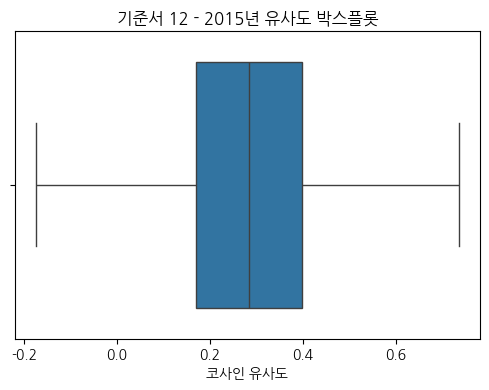

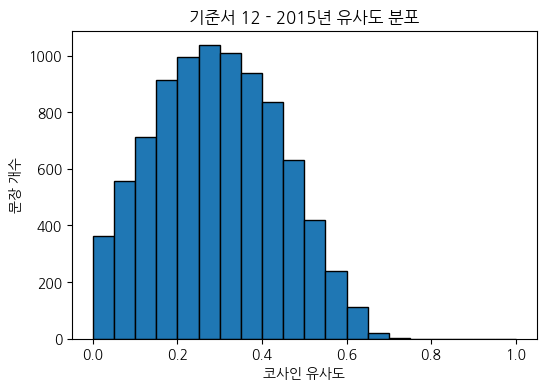


가장 유사한 문장 쌍 (유사도 0.735):
 [기준서 문장]: 년까지 유통 및 소비자 수준에서의 전 세계 인구 인당 음식물쓰레기 발생량을 절반으로 줄이고 출하 후 손실을 포함한 식품의 생산 및 공급망에서 발생하는 식품 손실을 감소한다.
 [연도 문장]: 예를 들어 시간이 부족한 사람이라면 돈이라는 물적 자원 을 활용하여 음식을 사 먹어 시간을 절약할 수 있다.

--- 2022년 ---
유사도 통계 - 평균: 0.345, 최소: -0.187, 최대: 0.912, 최빈값: 0.3400000035762787 (빈도: 215)


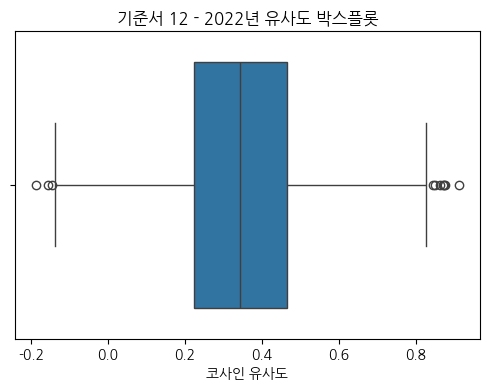

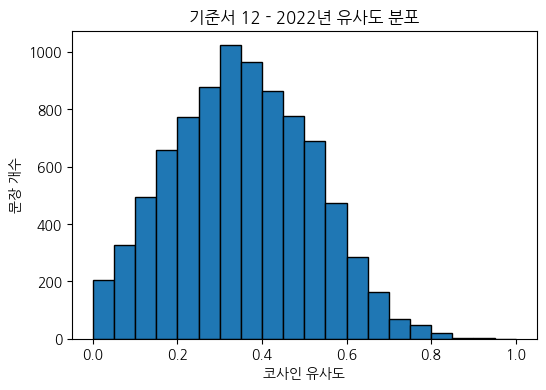


가장 유사한 문장 쌍 (유사도 0.912):
 [기준서 문장]: 년까지 예방 감축 재활용 및 재사용을 통해 폐기물 발생을 상당히 줄인다.
 [연도 문장]: 쓰레기를 줄여 낭비되는 자원을 줄이고 오염 물질을 최소화하는 것을 의미한다.

===== 기준서 문서 13 =====

--- 2015년 ---
유사도 통계 - 평균: 0.265, 최소: -0.145, 최대: 0.667, 최빈값: 0.27000001072883606 (빈도: 145)


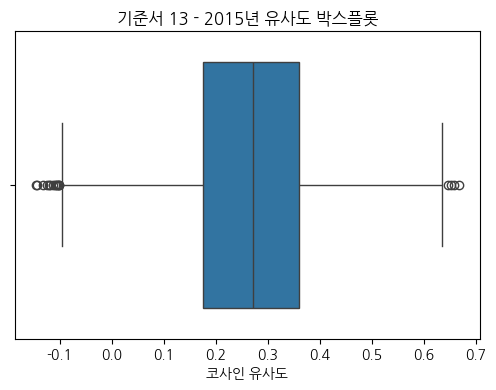

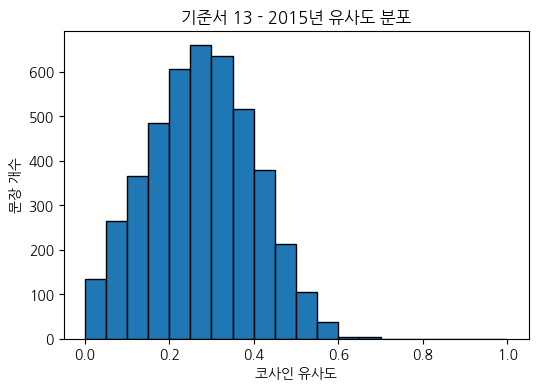


가장 유사한 문장 쌍 (유사도 0.667):
 [기준서 문장]: 기후변화의 완화 적응 영향 감소 조기 경보 등에 관한 교육 인식제고 인적 제도적 역량을 강화한다.
 [연도 문장]: .청소년의 자원관리 재 미 있 는 가 정 활 동 평소 자신의 하루 생활시간을 적어 보고 문제점을 분석한 후 삶의 질을 향상하기 위한 방법을 알아보자.

--- 2022년 ---
유사도 통계 - 평균: 0.325, 최소: -0.158, 최대: 0.850, 최빈값: 0.3799999952316284 (빈도: 128)


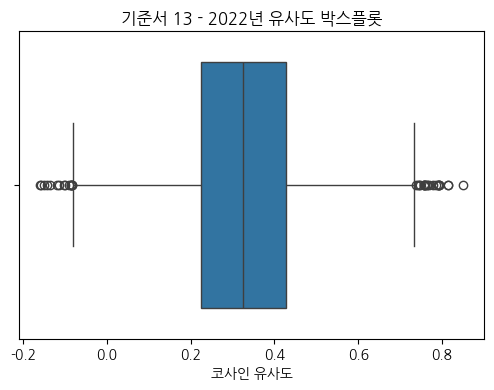

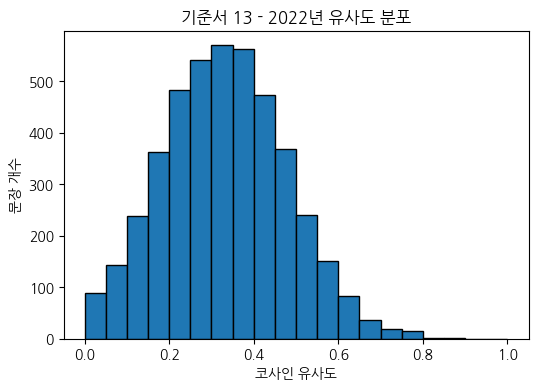


가장 유사한 문장 쌍 (유사도 0.850):
 [기준서 문장]: 기후변화 대응조치를 국가 정책 전략 및 계획에 통합한다.
 [연도 문장]: 기후 위기 문제를 해결하기 위해 국가나 지역 단체 기업 등에서 하고 있는 노력을 조사해 보자.

===== 기준서 문서 14 =====

--- 2015년 ---
유사도 통계 - 평균: 0.238, 최소: -0.179, 최대: 0.716, 최빈값: 0.20999999344348907 (빈도: 269)


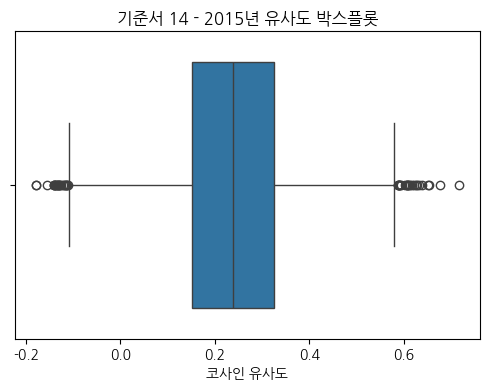

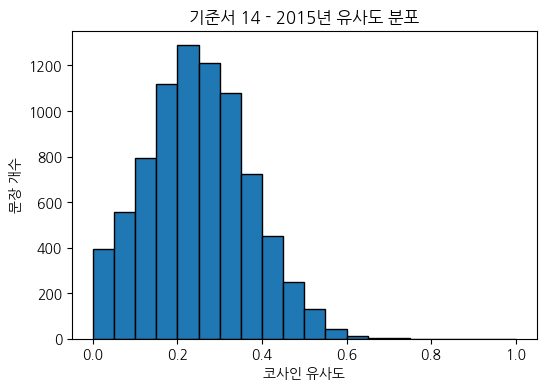


가장 유사한 문장 쌍 (유사도 0.716):
 [기준서 문장]: 년까지 심각한 악영향을 피하고자 회복력을 강화하는 방법을 포함하여 해양과 연안의 생태계를 지속가능하게 관리하고 보호하며 건강하고 생산적인 해양을 조성하기 위해 복원 조치를 시행한다.
 [연도 문장]: 물품은 깨끗이 사용하고 고장이 나면 바로 수리하는 등 자원을 잘 관리하면 더 오래 사용할 수 있다.

--- 2022년 ---
유사도 통계 - 평균: 0.300, 최소: -0.199, 최대: 0.785, 최빈값: 0.2800000011920929 (빈도: 225)


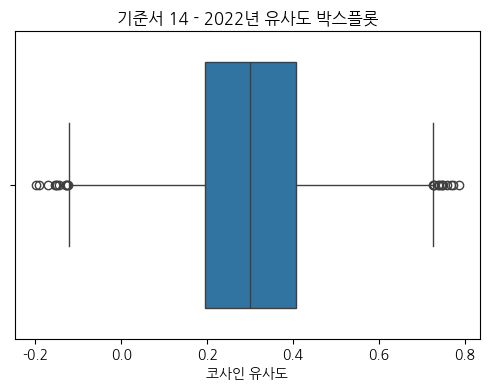

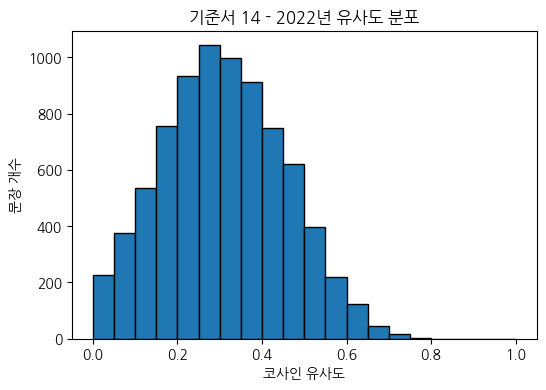


가장 유사한 문장 쌍 (유사도 0.785):
 [기준서 문장]: 년까지 해양 쓰레기와 영양염류 오염을 포함하여 특히 육상활동에서 발생하는 모든 종류의 해양 오염을 예방하고 상당한 수준으로 줄인다.
 [연도 문장]: 환경을 위한 노력 친환경 해체 기술을 적용하여 환경 오염 을 최소화한다.

===== 기준서 문서 15 =====

--- 2015년 ---
유사도 통계 - 평균: 0.237, 최소: -0.189, 최대: 0.701, 최빈값: 0.23000000417232513 (빈도: 321)


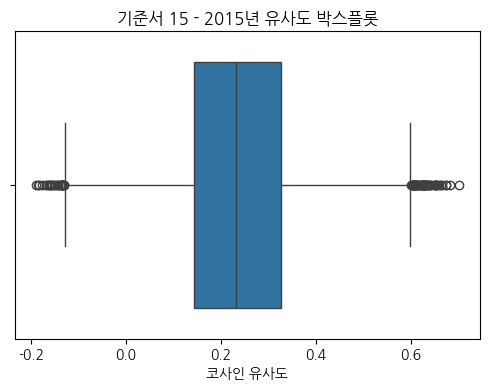

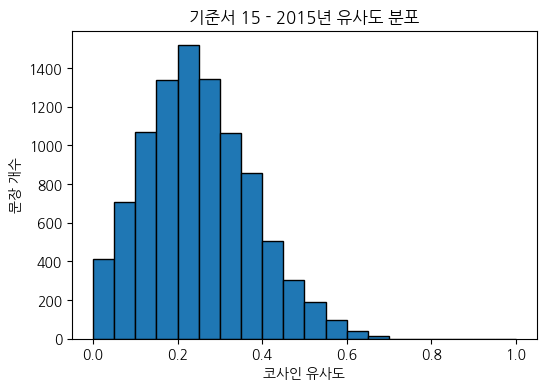


가장 유사한 문장 쌍 (유사도 0.701):
 [기준서 문장]: 년까지 생태계와 생물다양성의 가치를 국가 지역 계획 개발 프로세스 및 빈곤감소 전략과 회계 에 통합한다.
 [연도 문장]: 그림 자원의 효율적인 관리 방법 내가 가지고 있는 생활 자원을 분류하고 관리 계획을 세워 보자.

--- 2022년 ---
유사도 통계 - 평균: 0.321, 최소: -0.271, 최대: 0.799, 최빈값: 0.41999998688697815 (빈도: 242)


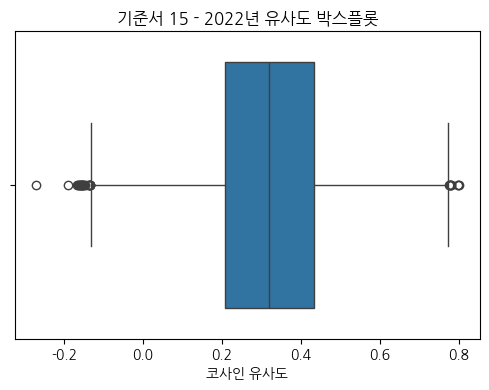

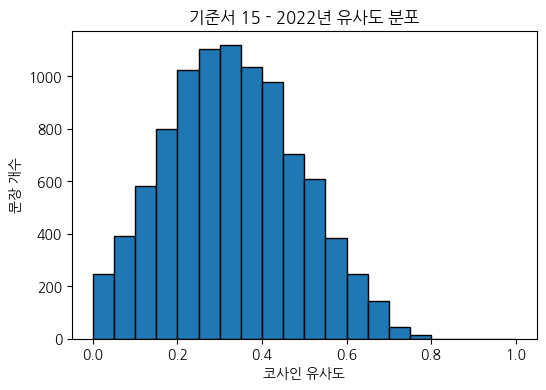


가장 유사한 문장 쌍 (유사도 0.799):
 [기준서 문장]: 년까지 생태계와 생물다양성의 가치를 국가 지역 계획 개발 프로세스 및 빈곤감소 전략과 회계 에 통합한다.
 [연도 문장]: 생활 자원의 순환과 의식주 자원 관리 의식주 생활 자원의 선택 과정과 결과의 성찰 의식주 생활 자원의 선택이 환경에 미치는 영향은 그림 과 같은 실천적 추 론 과정에 따라 성찰해 볼 수 있다.

===== 기준서 문서 16 =====

--- 2015년 ---
유사도 통계 - 평균: 0.234, 최소: -0.201, 최대: 0.724, 최빈값: 0.23000000417232513 (빈도: 278)


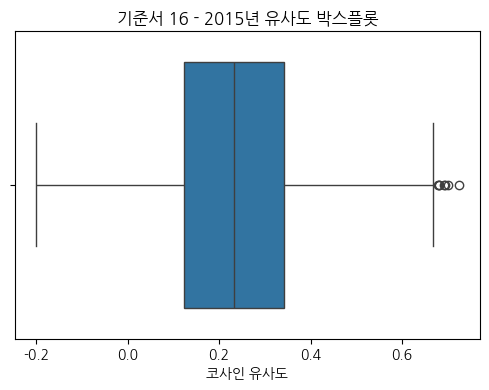

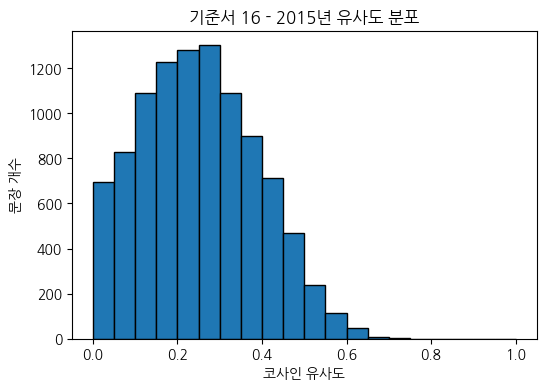


가장 유사한 문장 쌍 (유사도 0.724):
 [기준서 문장]: 효과적이고 책임성 있으며 투명한 제도를 모든 단계의 기관에 구축한다.
 [연도 문장]: 목표 세우기 명확하고 구체적으로 목표를 정한다.

--- 2022년 ---
유사도 통계 - 평균: 0.237, 최소: -0.174, 최대: 0.731, 최빈값: 0.1899999976158142 (빈도: 305)


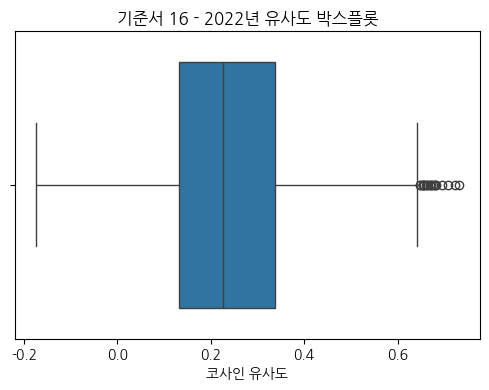

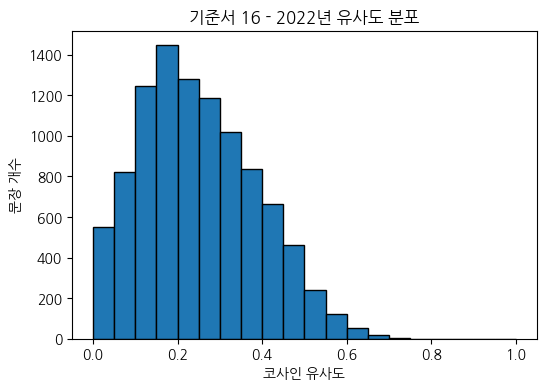


가장 유사한 문장 쌍 (유사도 0.731):
 [기준서 문장]: 지속가능발전을 위한 평화롭고 포용적인 사회 증진 모두에게 정의 보장과 모든 수준에서 효과적이고 책임성 있으며 포용적인 제도 구축 .
 [연도 문장]: 이러한 일상생활 속 작은 선택들이 쌓여 환경을 보호할 수 있으며 기후 위기에 취약한 사회적 약자를 보호함으로써 함께 살아가는 사회적 가치를 실현할 수 있다.

===== 기준서 문서 17 =====

--- 2015년 ---
유사도 통계 - 평균: 0.268, 최소: -0.206, 최대: 0.779, 최빈값: 0.2800000011920929 (빈도: 479)


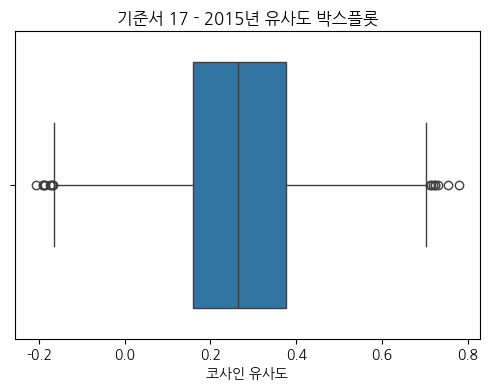

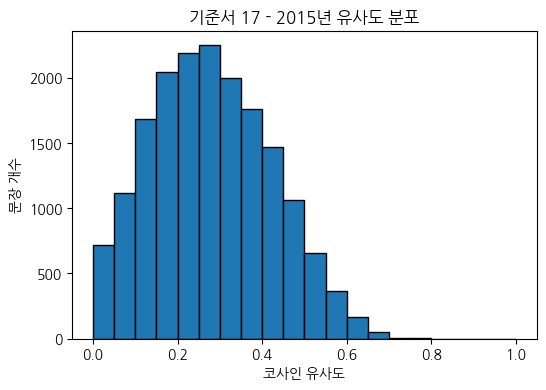


가장 유사한 문장 쌍 (유사도 0.779):
 [기준서 문장]: 파트너십의 경험과 재원조달 전략을 바탕으로 효과적인 공공 민관 시민사회의 파트너십을 장려하고 도모한다.
 [연도 문장]: 다른 사람들과의 협동을 통해 대인적 자원을 계발한다.

--- 2022년 ---
유사도 통계 - 평균: 0.273, 최소: -0.202, 최대: 0.748, 최빈값: 0.28999999165534973 (빈도: 473)


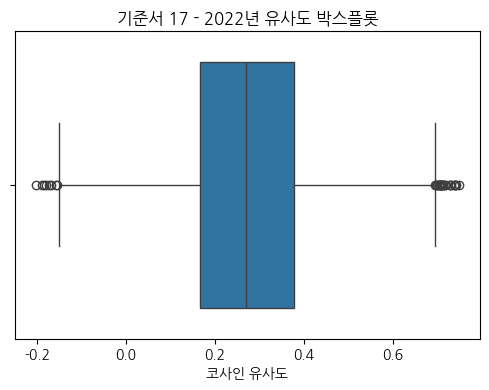

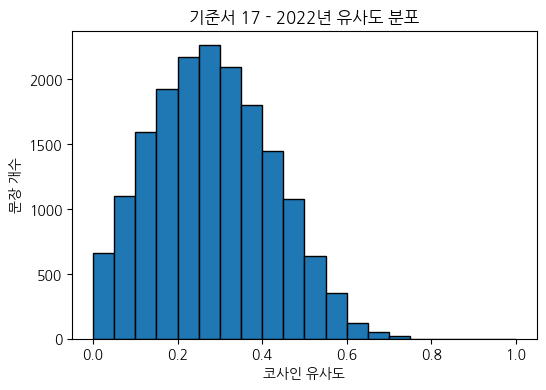


가장 유사한 문장 쌍 (유사도 0.748):
 [기준서 문장]: 제공을 목표로 설정하는 것을 고려하도록 장려한다.
 [연도 문장]: 가치 태도 의식주 생활 자원의 순환을 위해 우리가 할 수 있는 일을 이야기해 보자.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from sentence_transformers import SentenceTransformer, util

# --------------------------
# 1. 모델 로드 (한국어 최적 모델)
# --------------------------
model = SentenceTransformer("sentence-transformers/xlm-r-large-en-ko-nli-ststb")

# --------------------------
# 2. 미리 분할된 문장 리스트가 있다고 가정
#    - sentences_2015: 2015년도 문장 리스트
#    - sentences_2022: 2022년도 문장 리스트
#    - category_sentences: 기준서(문서 1~17)별 문장 리스트 (리스트 안에 17개의 리스트)
# --------------------------

# 2015, 2022년도 문장의 임베딩을 미리 계산 (한번에 계산)
embeddings_2015 = model.encode(sentences_2015, convert_to_tensor=True)
embeddings_2022 = model.encode(sentences_2022, convert_to_tensor=True)

# --------------------------
# 3. 각 기준서 문서(문서 1~17)와 각 연도(2015, 2022) 문장 간의 유사도 계산 및 분석
# --------------------------
for cat_idx, cat_sent_list in enumerate(category_sentences, start=1):
    print(f"\n===== 기준서 문서 {cat_idx} =====")

    # 기준서 문장의 임베딩 계산
    cat_embeddings = model.encode(cat_sent_list, convert_to_tensor=True)

    # 연도별로 처리 (2015년과 2022년)
    for year_label, year_embeddings, year_sentences in zip(
        ["2015년", "2022년"],
        [embeddings_2015, embeddings_2022],
        [sentences_2015, sentences_2022]
    ):
        print(f"\n--- {year_label} ---")

        # 기준서 문장과 해당 연도 문장 사이의 코사인 유사도 행렬 계산
        # sim_matrix.shape = (len(cat_sent_list), len(year_sentences))
        sim_matrix = util.cos_sim(cat_embeddings, year_embeddings)

        # 전체 유사도 값을 1차원 배열로 변환
        sim_scores = sim_matrix.cpu().numpy().flatten()

        # 유사도 통계 계산
        mean_sim = np.mean(sim_scores)
        min_sim = np.min(sim_scores)
        max_sim = np.max(sim_scores)
        # 최빈값 계산: 소수점 둘째자리로 반올림하여 빈도수 집계
        rounded_scores = np.round(sim_scores, 2)
        counter = collections.Counter(rounded_scores)
        mode_val, mode_count = counter.most_common(1)[0]

        print(f"유사도 통계 - 평균: {mean_sim:.3f}, 최소: {min_sim:.3f}, 최대: {max_sim:.3f}, 최빈값: {mode_val} (빈도: {mode_count})")

        # --------------------------
        # 3-1. 박스플롯으로 유사도 분포 시각화
        # --------------------------
        plt.figure(figsize=(6,4))
        sns.boxplot(x=sim_scores)
        plt.title(f"기준서 {cat_idx} - {year_label} 유사도 박스플롯")
        plt.xlabel("코사인 유사도")
        plt.show()

        # --------------------------
        # 3-2. 히스토그램으로 구간별 문장 수 시각화
        # --------------------------
        plt.figure(figsize=(6,4))
        bins = np.linspace(0, 1, 21)  # 0~1 범위를 20 구간으로 나눔
        plt.hist(sim_scores, bins=bins, edgecolor='black')
        plt.title(f"기준서 {cat_idx} - {year_label} 유사도 분포")
        plt.xlabel("코사인 유사도")
        plt.ylabel("문장 개수")
        plt.show()

        # --------------------------
        # 3-3. 가장 유사한 문장 쌍 찾기
        # --------------------------
        max_idx = np.argmax(sim_scores)
        # 2차원 행렬 인덱스로 변환: 행(기준서 문장 인덱스), 열(연도 문장 인덱스)
        num_year = sim_matrix.shape[1]
        cat_sentence_index = max_idx // num_year
        year_sentence_index = max_idx % num_year
        highest_sim = sim_scores[max_idx]

        print(f"\n가장 유사한 문장 쌍 (유사도 {highest_sim:.3f}):")
        print(" [기준서 문장]:", cat_sent_list[cat_sentence_index])
        print(" [연도 문장]:", year_sentences[year_sentence_index])



===== 기준서 문서 1 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.244203 -0.192480  0.707293  0.23       182.0
2022년  0.262101 -0.253607  0.751588  0.29       172.0


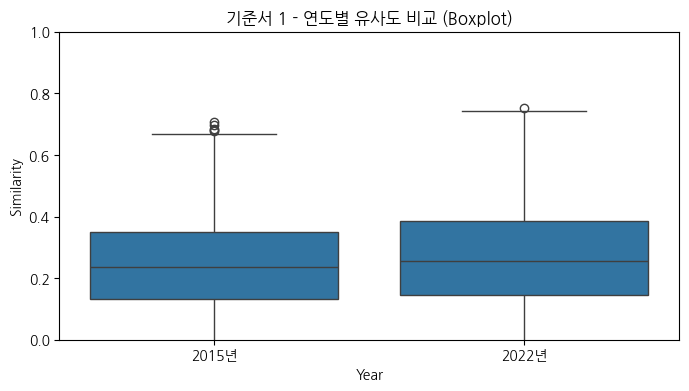

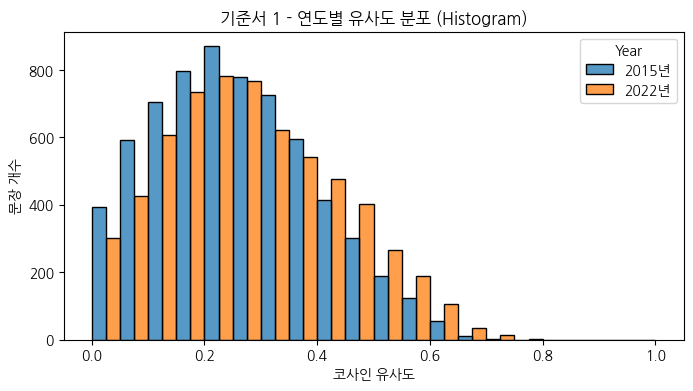


[2015년 - 가장 유사한 문장 쌍 (유사도 0.707)]
  기준서 문장 : 개도국 특히 최빈개도국에게 모든 측면에서 빈곤을 종식하기 위한 프로그램과 정책을 이행할 수 있는 적절하고 예측 가능한 수단을 제공하기 위하여 개발 협력 증진 등을 통한 다양한 원천으로부터의 자원의 상당한 동원을 보장한다.
  해당 연도 문장 : 따라서 생활 자원을 적절히 배분하여 사용함 으로써 자신과 가족의 욕구를 최대한 충족시키고 생활의 질을 향상시킬 수 있도 록 한다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.752)]
  기준서 문장 : 년까지 빈곤층과 취약계층의 회복력을 구축하고 극한 기후에 관련된 사건이나 기타 경제 사회 환경적 충격 및 재난에 대한 노출과 취약성을 감소한다.
  해당 연도 문장 : 그림 그러므로 자원의 낭비를 최소화하고 환경에 미치는 부정적인 영향과 폐기되는 자원을 줄이려고 노력해야 한다.

===== 기준서 문서 2 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.219094 -0.212500  0.717188  0.20       213.0
2022년  0.302441 -0.216387  0.840178  0.39       171.0


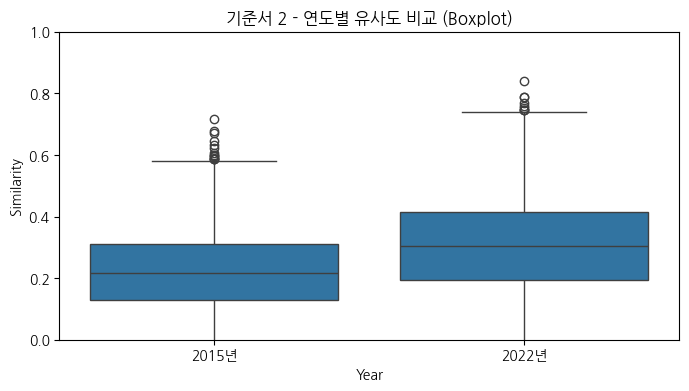

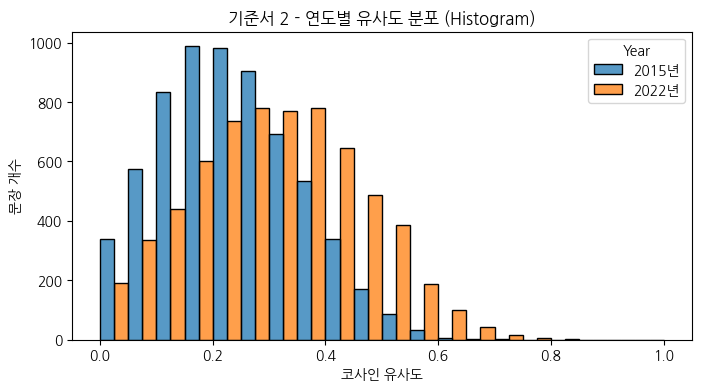


[2015년 - 가장 유사한 문장 쌍 (유사도 0.717)]
  기준서 문장 : 년까지 기아를 종식시키고 영유아를 포함한 모든 사람 특히 빈곤층과 취약계층이 연중 안전하고 영양가 있는 충분한 식량에 대한 접근을 보장한다.
  해당 연도 문장 : 예를 들어 시간이 부족한 사람이라면 돈이라는 물적 자원 을 활용하여 음식을 사 먹어 시간을 절약할 수 있다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.840)]
  기준서 문장 : 식료품 시장 및 파생상품 시장의 적절한 기능을 보장할 수 있는 방안을 채택하고 과도한 식량가격의 변동성을 제한할 수 있도록 식량 저장과 같은 시장 정보에의 적시 접근을 원활하게하기 위한 조치를 채택한다.
  해당 연도 문장 : 식품의 알맞은 보관 방법을 통해 음식물 쓰레기 발생을 줄인다.

===== 기준서 문서 3 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.213055 -0.182055  0.784752  0.18       315.0
2022년  0.242507 -0.188068  0.740476  0.22       293.0


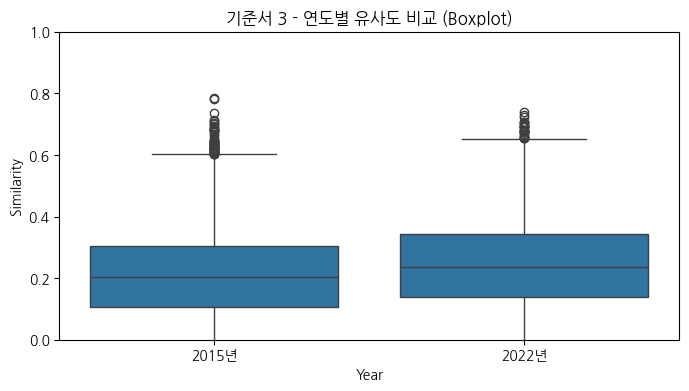

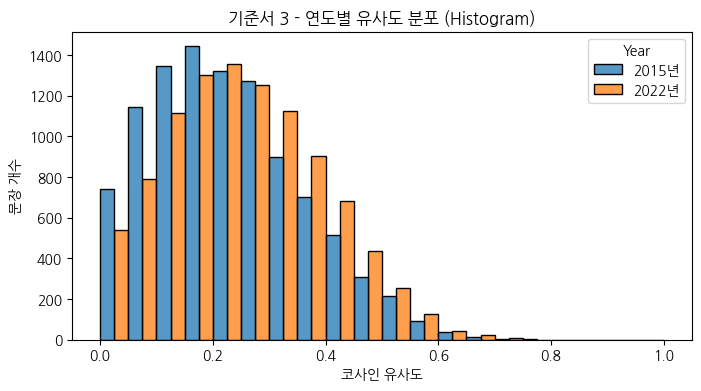


[2015년 - 가장 유사한 문장 쌍 (유사도 0.785)]
  기준서 문장 : 모든 연령층을 위한 건강한 삶 보장과 웰빙 증진 .
  해당 연도 문장 : .생활자원의 특성 위와 같이 우리의 생명과 건강을 유지하고 욕구를 충족하며 목표를 이루기 위해 사용하는 모든 자원을 생활 자원이라고 한다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.740)]
  기준서 문장 : 년까지 유해 화학물질 대기 수질 토지 공해 및 오염으로 인한 사망과 질병 건수를 상당히 감소한다.
  해당 연도 문장 : 쓰레기를 줄여 낭비되는 자원을 줄이고 오염 물질을 최소화하는 것을 의미한다.

===== 기준서 문서 4 =====

[유사도 요약 통계]
           Mean      Min       Max  Mode  Mode Count
Year                                                
2015년  0.302063 -0.21675  0.750615  0.33       245.0
2022년  0.254064 -0.21993  0.778726  0.26       246.0


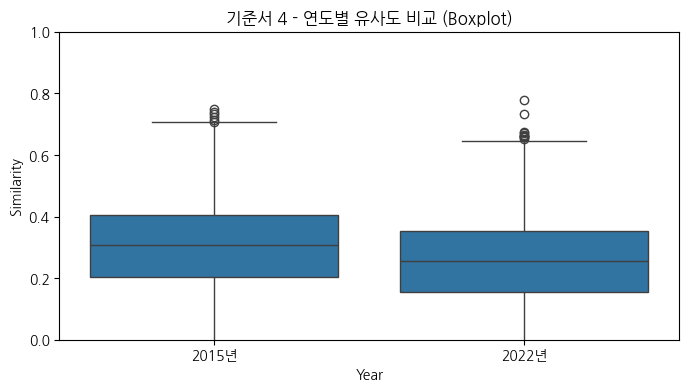

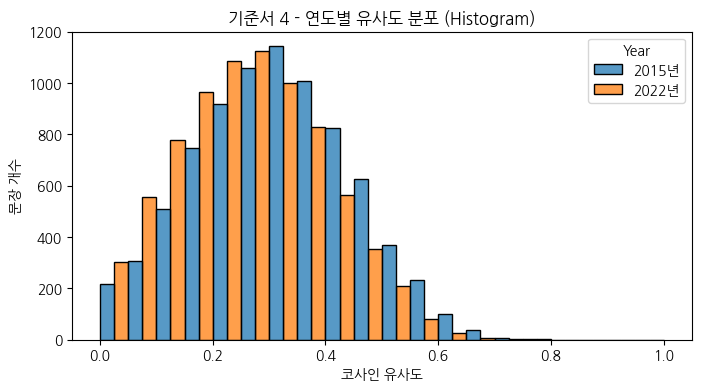


[2015년 - 가장 유사한 문장 쌍 (유사도 0.751)]
  기준서 문장 : 년까지 취업 양질의 일자리 창업 활동에 필요한 전문 직업 기술 등 적합한 기술을 지닌 청소년과 성인의 수를 실질적으로 늘린다.
  해당 연도 문장 : 청소년의 자원 관리 청소년의 학업 관리 관리 청소년기는 일상생활을 위한 기본적 지식과 향후 진학과 진로를 결정하는 데 필요한 전문 적 지식을 함양하는 매우 중요한 시기이다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.779)]
  기준서 문장 : 년까지 취업 양질의 일자리 창업 활동에 필요한 전문 직업 기술 등 적합한 기술을 지닌 청소년과 성인의 수를 실질적으로 늘린다.
  해당 연도 문장 : 인적 자원 계발하기 꾸준한 노력으로 지식 기술 창의력 등의 인적 자원을 늘린다.

===== 기준서 문서 5 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.198472 -0.167995  0.805272  0.08       220.0
2022년  0.214555 -0.155634  0.726975  0.17       232.0


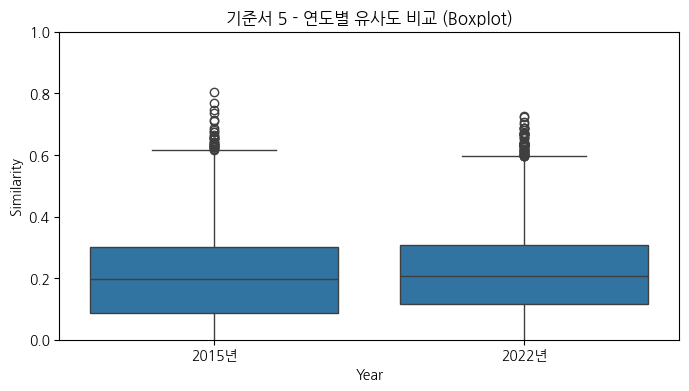

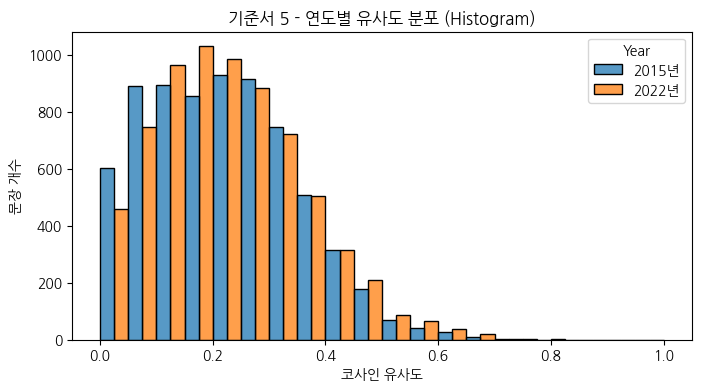


[2015년 - 가장 유사한 문장 쌍 (유사도 0.805)]
  기준서 문장 : 공공서비스 사회기반시설 및 사회적 보호정책을 제공하고 국가별로 적절하게 가구와 가족 내에서의 책임 분담을 증진함으로써 무상 돌봄과 가사노동을 인정하고 가치 있게 인식한다.
  해당 연도 문장 : 생활 자원의 특성 생활 자원이란 나와 가족의 욕구를 충족시키고 목표를 달성하는 데 활용할 수 있는 수단과 방법이다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.727)]
  기준서 문장 : 공공서비스 사회기반시설 및 사회적 보호정책을 제공하고 국가별로 적절하게 가구와 가족 내에서의 책임 분담을 증진함으로써 무상 돌봄과 가사노동을 인정하고 가치 있게 인식한다.
  해당 연도 문장 : 그중 일상생활에서 나와 가족의 욕구를 충족하고 목표를 달성하기 위해 활용 할 수 있는 모든 수단이나 방법을 생활 자원이라고 한다.

===== 기준서 문서 6 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.248304 -0.199745  0.646804  0.22       240.0
2022년  0.317685 -0.154623  0.834377  0.35       182.0


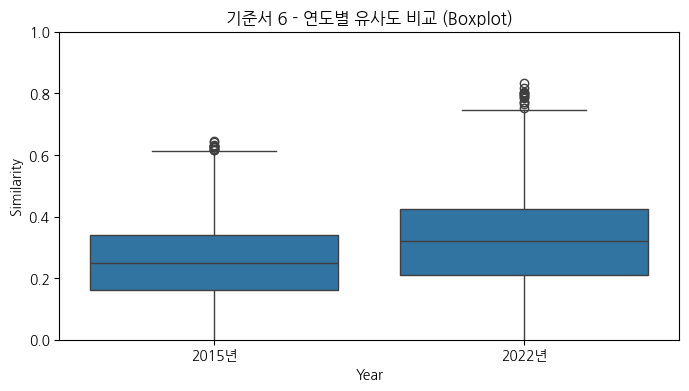

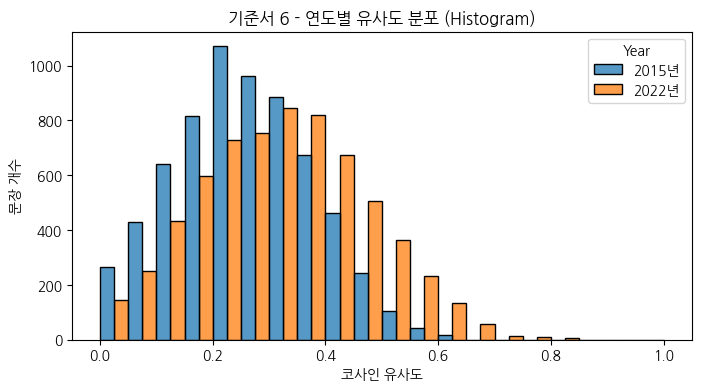


[2015년 - 가장 유사한 문장 쌍 (유사도 0.647)]
  기준서 문장 : 년까지 집수 담수화 물 효율성 폐수처리 재활용 및 재사용 기술을 포함하는 물과 위생 관련 활동과 프로그램에 있어 개도국 역량 강화 지원과 국제적 협력을 확대한다.
  해당 연도 문장 : 생 생 활 여 리 물 가 모 적 정 기 선 달 물 인 력 장 시 물 목 차 표 적 물 간 할 일 목 록 노 동 리 평 가 관 생 여 가 치 장 활 산 정 적 자 원 선 지 간 원 실 순 정 복 지 행 위 가 청 소 적 자 원 디 자 년 자 원 관 리 와 자 나와 가족의 욕구를 충족시키고 목표를 달성하는 데 활용할 수 있는 수단과 방법 립 개인이 가진 특성이나 능력에 관련된 자원으로 노력에 따라 높은 수준으로 발전할 수 있는 자원 양과 질을 쉽게 측정할 수 있는 생활 자원 생활하는 데 필요한 에너지를 생산하고 건강한 생명을 유지하는 데 필요한 시간을 생활시간이라고 한다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.834)]
  기준서 문장 : 년까지 오염 저감 유해물질의 투기 근절과 배출 최소화 미처리 폐수 비율 반감 전 세계에서 재활용과 안전한 재사용의 대폭 증진을 통해 수질을 개선한다.
  해당 연도 문장 : 환경을 위한 노력 친환경 해체 기술을 적용하여 환경 오염 을 최소화한다.

===== 기준서 문서 7 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.296929 -0.180717  0.674527  0.33       134.0
2022년  0.285314 -0.175627  0.747819  0.29       132.0


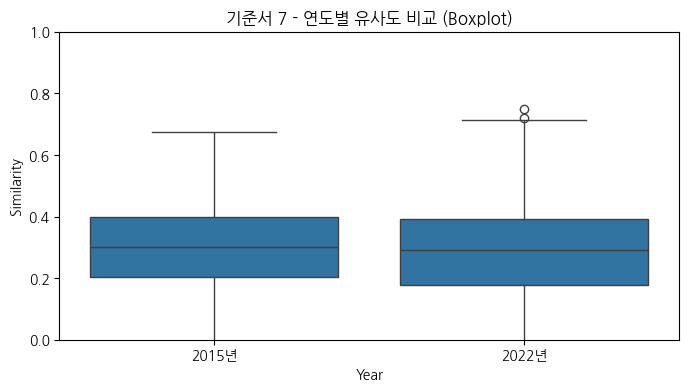

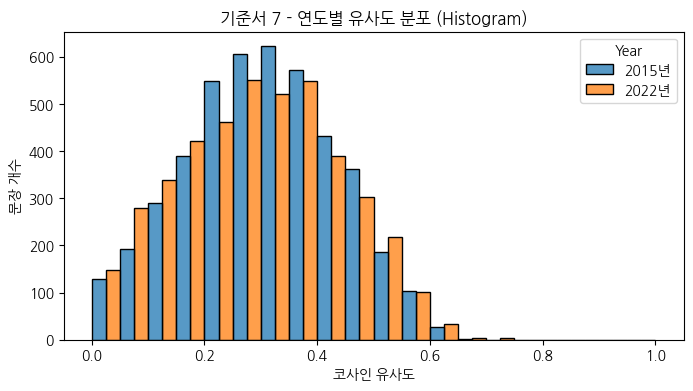


[2015년 - 가장 유사한 문장 쌍 (유사도 0.675)]
  기준서 문장 : 년까지 개도국 특히 최빈개도국 군소도서개도국 및 내륙개도국에서 각국의 지원 프로그램에 따라 모두를 위한 현대적이고 지속가능한 에너지 서비스를 공급하기 위한 기반시설을 확대하고 기술을 개선한다.
  해당 연도 문장 : 인적 자원을 최대한 것 지식 기술 창의력 판단력 등의 인적 자원을 꾸준히 개발하여 활용한다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.748)]
  기준서 문장 : 년까지 개도국 특히 최빈개도국 군소도서개도국 및 내륙개도국에서 각국의 지원 프로그램에 따라 모두를 위한 현대적이고 지속가능한 에너지 서비스를 공급하기 위한 기반시설을 확대하고 기술을 개선한다.
  해당 연도 문장 : 인적 자원 계발하기 꾸준한 노력으로 지식 기술 창의력 등의 인적 자원을 늘린다.

===== 기준서 문서 8 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.273855 -0.237955  0.686077  0.34       272.0
2022년  0.266846 -0.222556  0.808484  0.22       258.0


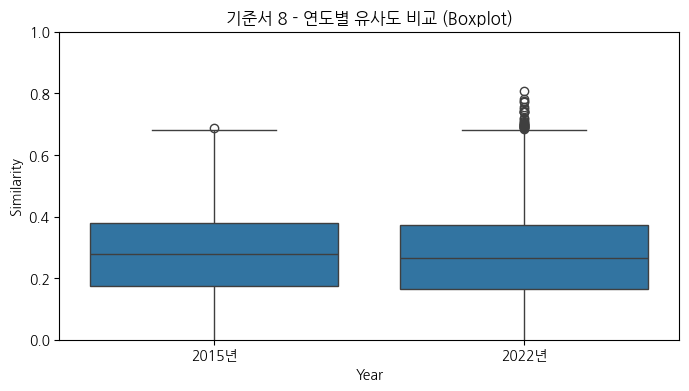

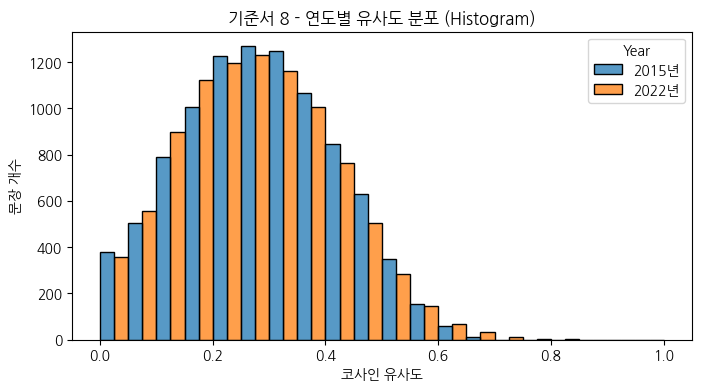


[2015년 - 가장 유사한 문장 쌍 (유사도 0.686)]
  기준서 문장 : 년까지 청년 고용을 위한 글로벌 전략을 개발하고 운영하며 국제노동 기구 세계고용협약 을 이행한다.
  해당 연도 문장 : 청소년의 자원 관리 청소년의 학업 관리 관리 청소년기는 일상생활을 위한 기본적 지식과 향후 진학과 진로를 결정하는 데 필요한 전문 적 지식을 함양하는 매우 중요한 시기이다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.808)]
  기준서 문장 : 지속가능한 소비와 생산에 관한 개년 계획에 따라 선진국들이 주도하여 소비와 생산에 있어서의 전 세계적인 자원 효율성을 년까지 점진적으로 개선하고 경제성장을 환경 악화로부터 분리시키도록 노력한다.
  해당 연도 문장 : 기대하는 목표 세우기 환경 오염과 기후 위기를 극복할 수 있도록 의식주 생활 자원을 선택할 때 기대하는 목표를 세워 보자.

===== 기준서 문서 9 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.281822 -0.199415  0.735269  0.26       194.0
2022년  0.302992 -0.209776  0.813820  0.30       175.0


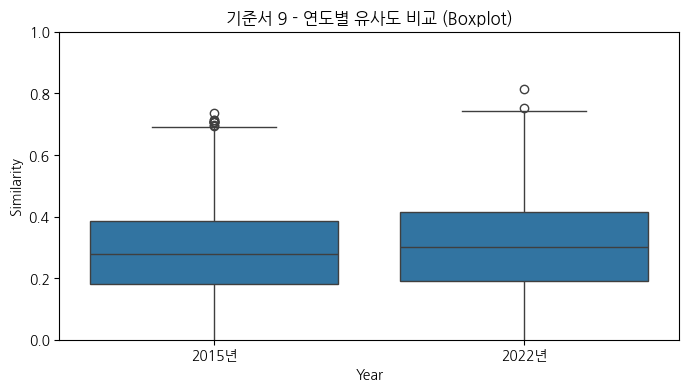

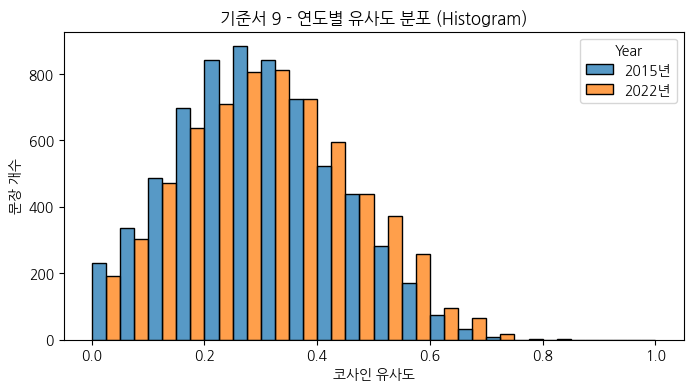


[2015년 - 가장 유사한 문장 쌍 (유사도 0.735)]
  기준서 문장 : 모두를 위한 적정가격의 공평한 접근에 중점을 두고 경제발전과 인류의 웰빙을 지원하기 위해 지역별 및 초국경 사회기반시설을 포함하여 양질의 신뢰할 수 있고 지속가능하며 복원력 있는 사회기반시설을 구축한다.
  해당 연도 문장 : 따라서 생활 자원을 적절히 배분하여 사용함 으로써 자신과 가족의 욕구를 최대한 충족시키고 생활의 질을 향상시킬 수 있도 록 한다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.814)]
  기준서 문장 : 모두를 위한 적정가격의 공평한 접근에 중점을 두고 경제발전과 인류의 웰빙을 지원하기 위해 지역별 및 초국경 사회기반시설을 포함하여 양질의 신뢰할 수 있고 지속가능하며 복원력 있는 사회기반시설을 구축한다.
  해당 연도 문장 : 그 러므로 의식주 자원을 관리할 때 인간의 욕구 충족 및 목표 달성이라는 가치와 환 경 보전이라는 가치가 서로 적절히 조화를 이룰 수 있도록 해야 한다.

===== 기준서 문서 10 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.256601 -0.211927  0.706074  0.24       238.0
2022년  0.256573 -0.154890  0.719371  0.23       254.0


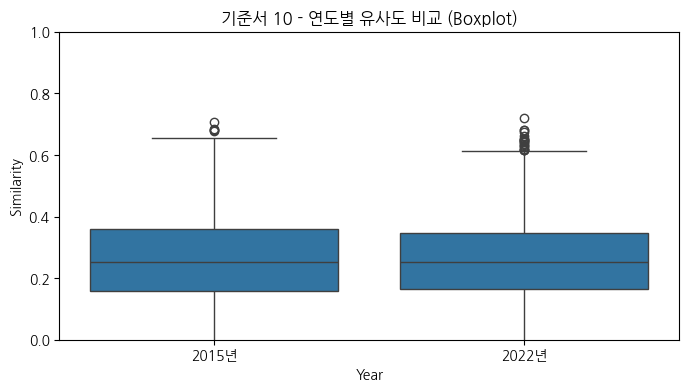

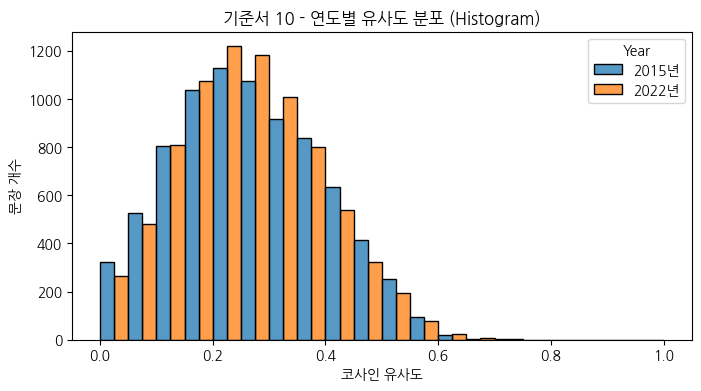


[2015년 - 가장 유사한 문장 쌍 (유사도 0.706)]
  기준서 문장 : 계획되고 잘 관리된 이주정책 이행 등을 통하여 질서 있고 안전하며 정기적이고 책임감 있는 이주와 사람의 이동을 촉진한다.
  해당 연도 문장 : 따라서 합리적인 계획과 실천을 통해 자신의 생활을 효율적으로 관리하고 미래의 인생을 설계 하고 준비할 수 있도록 한다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.719)]
  기준서 문장 : 계획되고 잘 관리된 이주정책 이행 등을 통하여 질서 있고 안전하며 정기적이고 책임감 있는 이주와 사람의 이동을 촉진한다.
  해당 연도 문장 : 생활 자원의 순환 과정을 이해하고 생활 자원을 효율적으로 관리할 수 있다.

===== 기준서 문서 11 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.268897 -0.172983  0.739594  0.29       250.0
2022년  0.307557 -0.148321  0.855683  0.26       220.0


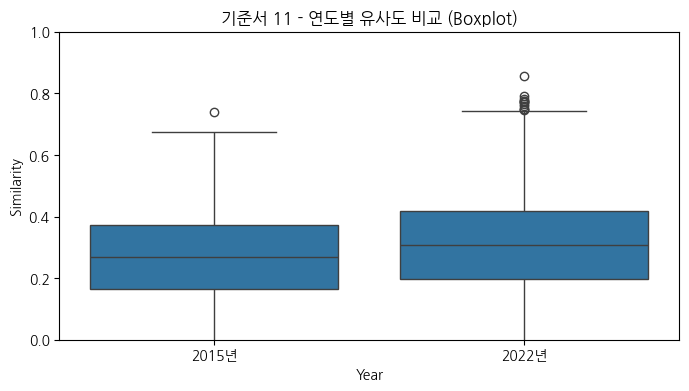

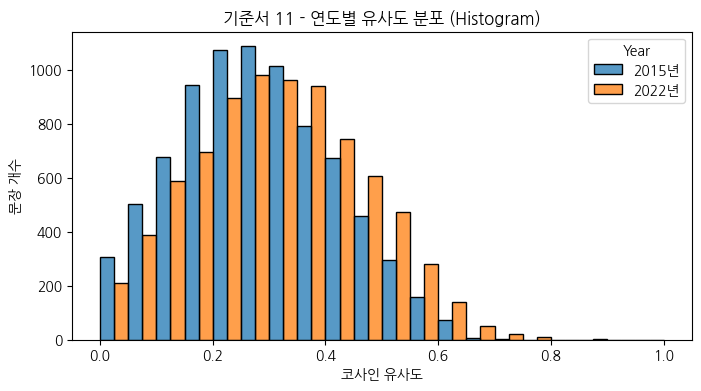


[2015년 - 가장 유사한 문장 쌍 (유사도 0.740)]
  기준서 문장 : 년까지 모두를 위한 적절하고 안전한 적정가격의 주택 및 기초서비스에 대한 접근을 보장하고 빈민가 환경을 개선한다.
  해당 연도 문장 : 따라서 생활 자원을 적절히 배분하여 사용함 으로써 자신과 가족의 욕구를 최대한 충족시키고 생활의 질을 향상시킬 수 있도 록 한다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.856)]
  기준서 문장 : 년까지 대기질 도시생활 폐기물 및 기타 폐기물 관리에 특별한 주의를 기울임으로써 도시의 인당 부정적 환경영향을 줄인다.
  해당 연도 문장 : 쓰레기 배출량을 에 가깝게 줄여 환경을 보호하는 실천 운동이지.

===== 기준서 문서 12 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.281943 -0.174630  0.735414  0.29       238.0
2022년  0.344523 -0.186535  0.911647  0.34       215.0


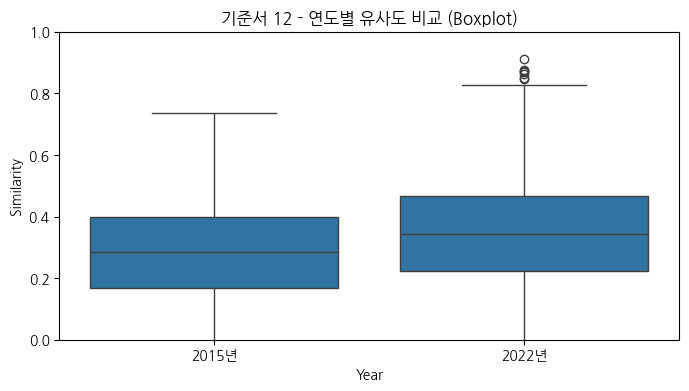

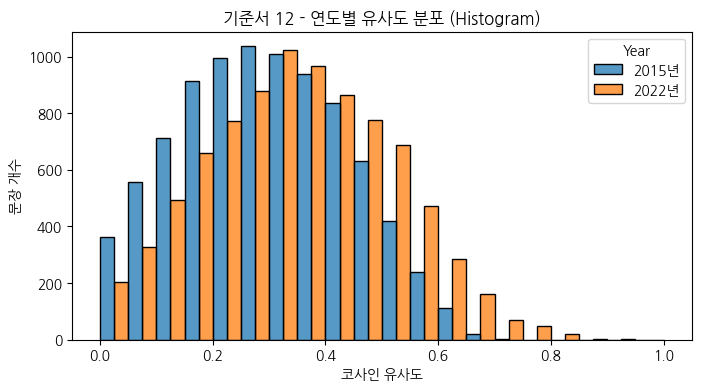


[2015년 - 가장 유사한 문장 쌍 (유사도 0.735)]
  기준서 문장 : 년까지 유통 및 소비자 수준에서의 전 세계 인구 인당 음식물쓰레기 발생량을 절반으로 줄이고 출하 후 손실을 포함한 식품의 생산 및 공급망에서 발생하는 식품 손실을 감소한다.
  해당 연도 문장 : 예를 들어 시간이 부족한 사람이라면 돈이라는 물적 자원 을 활용하여 음식을 사 먹어 시간을 절약할 수 있다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.912)]
  기준서 문장 : 년까지 예방 감축 재활용 및 재사용을 통해 폐기물 발생을 상당히 줄인다.
  해당 연도 문장 : 쓰레기를 줄여 낭비되는 자원을 줄이고 오염 물질을 최소화하는 것을 의미한다.

===== 기준서 문서 13 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.264773 -0.145385  0.667254  0.27       145.0
2022년  0.325397 -0.158451  0.850277  0.38       128.0


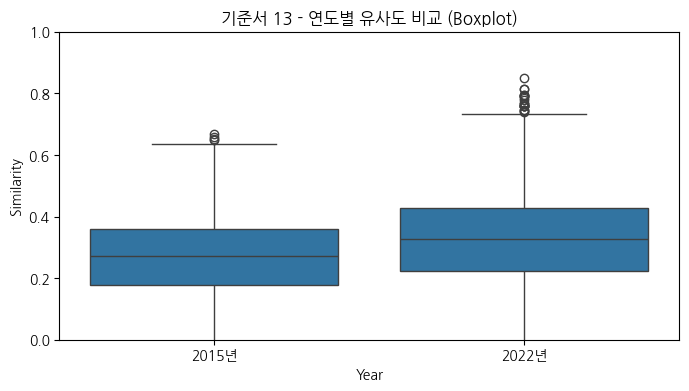

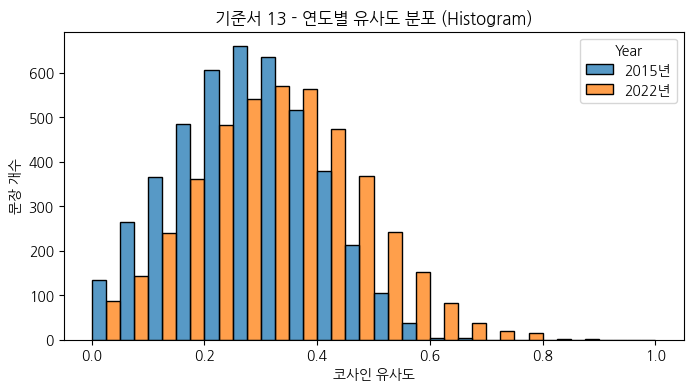


[2015년 - 가장 유사한 문장 쌍 (유사도 0.667)]
  기준서 문장 : 기후변화의 완화 적응 영향 감소 조기 경보 등에 관한 교육 인식제고 인적 제도적 역량을 강화한다.
  해당 연도 문장 : .청소년의 자원관리 재 미 있 는 가 정 활 동 평소 자신의 하루 생활시간을 적어 보고 문제점을 분석한 후 삶의 질을 향상하기 위한 방법을 알아보자.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.850)]
  기준서 문장 : 기후변화 대응조치를 국가 정책 전략 및 계획에 통합한다.
  해당 연도 문장 : 기후 위기 문제를 해결하기 위해 국가나 지역 단체 기업 등에서 하고 있는 노력을 조사해 보자.

===== 기준서 문서 14 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.237740 -0.178610  0.716429  0.21       269.0
2022년  0.299942 -0.198513  0.785288  0.28       225.0


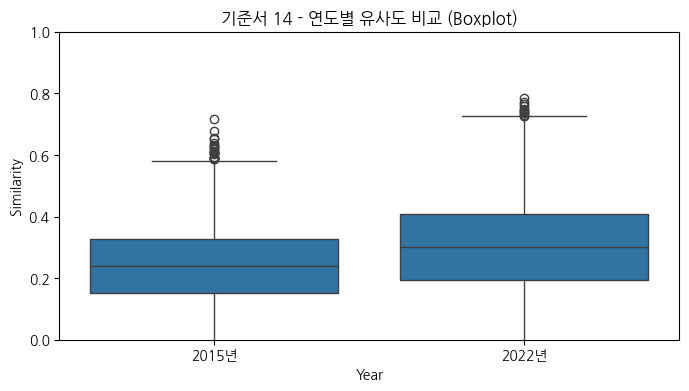

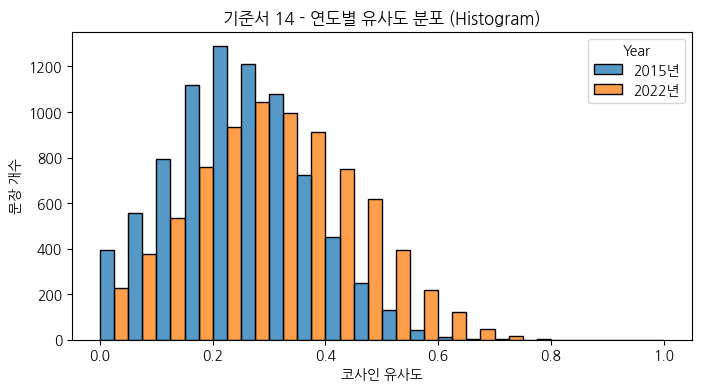


[2015년 - 가장 유사한 문장 쌍 (유사도 0.716)]
  기준서 문장 : 년까지 심각한 악영향을 피하고자 회복력을 강화하는 방법을 포함하여 해양과 연안의 생태계를 지속가능하게 관리하고 보호하며 건강하고 생산적인 해양을 조성하기 위해 복원 조치를 시행한다.
  해당 연도 문장 : 물품은 깨끗이 사용하고 고장이 나면 바로 수리하는 등 자원을 잘 관리하면 더 오래 사용할 수 있다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.785)]
  기준서 문장 : 년까지 해양 쓰레기와 영양염류 오염을 포함하여 특히 육상활동에서 발생하는 모든 종류의 해양 오염을 예방하고 상당한 수준으로 줄인다.
  해당 연도 문장 : 환경을 위한 노력 친환경 해체 기술을 적용하여 환경 오염 을 최소화한다.

===== 기준서 문서 15 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.236826 -0.189141  0.701228  0.23       321.0
2022년  0.320815 -0.271212  0.799343  0.42       242.0


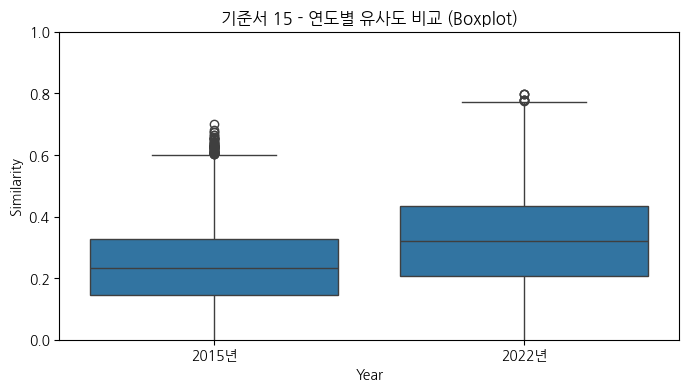

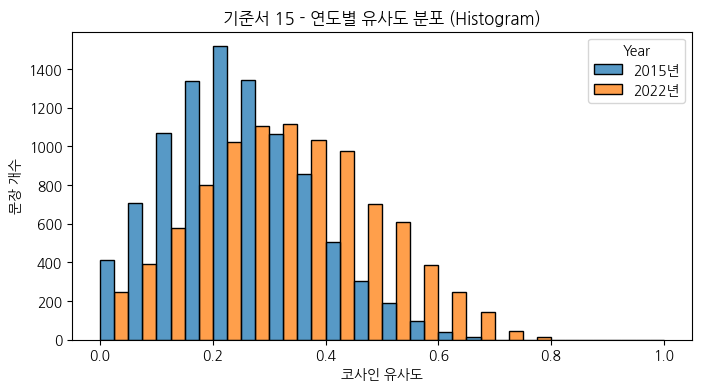


[2015년 - 가장 유사한 문장 쌍 (유사도 0.701)]
  기준서 문장 : 년까지 생태계와 생물다양성의 가치를 국가 지역 계획 개발 프로세스 및 빈곤감소 전략과 회계 에 통합한다.
  해당 연도 문장 : 그림 자원의 효율적인 관리 방법 내가 가지고 있는 생활 자원을 분류하고 관리 계획을 세워 보자.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.799)]
  기준서 문장 : 년까지 생태계와 생물다양성의 가치를 국가 지역 계획 개발 프로세스 및 빈곤감소 전략과 회계 에 통합한다.
  해당 연도 문장 : 생활 자원의 순환과 의식주 자원 관리 의식주 생활 자원의 선택 과정과 결과의 성찰 의식주 생활 자원의 선택이 환경에 미치는 영향은 그림 과 같은 실천적 추 론 과정에 따라 성찰해 볼 수 있다.

===== 기준서 문서 16 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.234151 -0.200659  0.724273  0.23       278.0
2022년  0.236895 -0.174198  0.730869  0.19       305.0


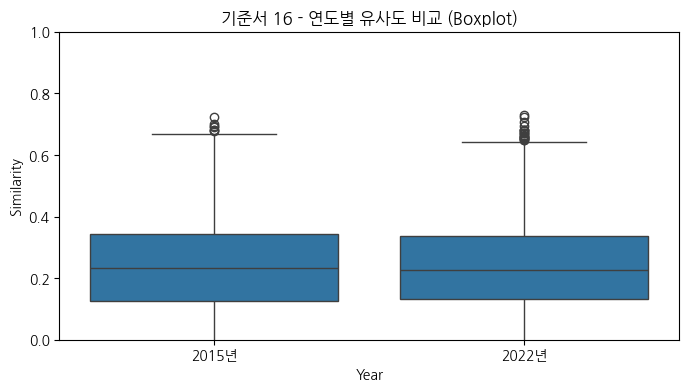

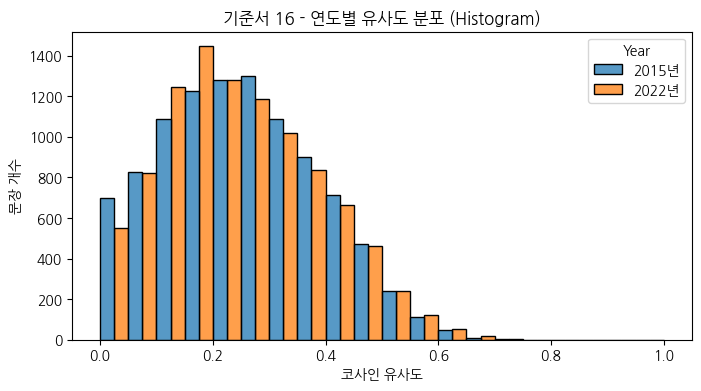


[2015년 - 가장 유사한 문장 쌍 (유사도 0.724)]
  기준서 문장 : 효과적이고 책임성 있으며 투명한 제도를 모든 단계의 기관에 구축한다.
  해당 연도 문장 : 목표 세우기 명확하고 구체적으로 목표를 정한다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.731)]
  기준서 문장 : 지속가능발전을 위한 평화롭고 포용적인 사회 증진 모두에게 정의 보장과 모든 수준에서 효과적이고 책임성 있으며 포용적인 제도 구축 .
  해당 연도 문장 : 이러한 일상생활 속 작은 선택들이 쌓여 환경을 보호할 수 있으며 기후 위기에 취약한 사회적 약자를 보호함으로써 함께 살아가는 사회적 가치를 실현할 수 있다.

===== 기준서 문서 17 =====

[유사도 요약 통계]
           Mean       Min       Max  Mode  Mode Count
Year                                                 
2015년  0.267706 -0.206497  0.778748  0.28       479.0
2022년  0.273205 -0.201710  0.748239  0.29       473.0


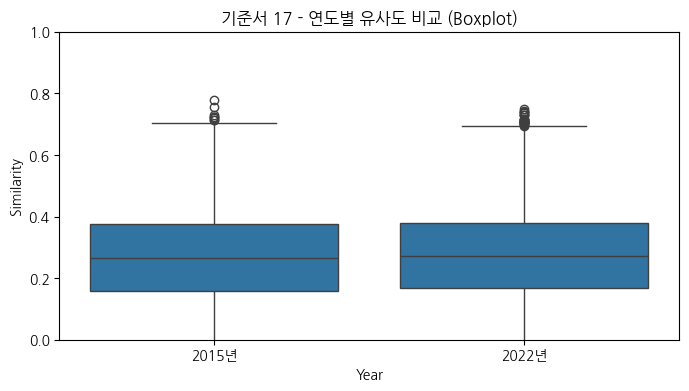

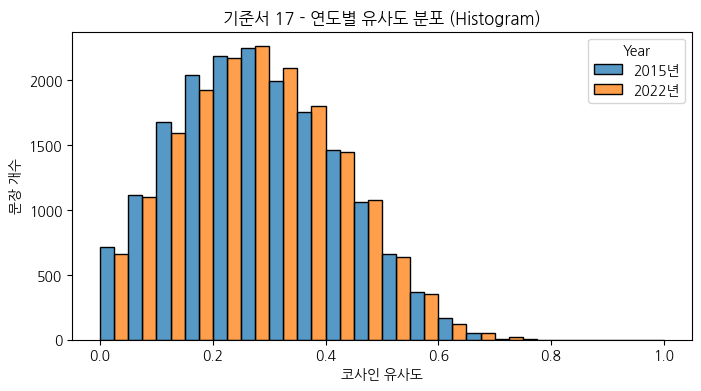


[2015년 - 가장 유사한 문장 쌍 (유사도 0.779)]
  기준서 문장 : 파트너십의 경험과 재원조달 전략을 바탕으로 효과적인 공공 민관 시민사회의 파트너십을 장려하고 도모한다.
  해당 연도 문장 : 다른 사람들과의 협동을 통해 대인적 자원을 계발한다.

[2022년 - 가장 유사한 문장 쌍 (유사도 0.748)]
  기준서 문장 : 제공을 목표로 설정하는 것을 고려하도록 장려한다.
  해당 연도 문장 : 가치 태도 의식주 생활 자원의 순환을 위해 우리가 할 수 있는 일을 이야기해 보자.

===== 전체 기준서별 유사도 요약 통계 =====
     Year      Mean       Min       Max  Mode  Mode Count Category
0   2015년  0.244203 -0.192480  0.707293  0.23       182.0    기준서 1
1   2022년  0.262101 -0.253607  0.751588  0.29       172.0    기준서 1
2   2015년  0.219094 -0.212500  0.717188  0.20       213.0    기준서 2
3   2022년  0.302441 -0.216387  0.840178  0.39       171.0    기준서 2
4   2015년  0.213055 -0.182055  0.784752  0.18       315.0    기준서 3
5   2022년  0.242507 -0.188068  0.740476  0.22       293.0    기준서 3
6   2015년  0.302063 -0.216750  0.750615  0.33       245.0    기준서 4
7   2022년  0.254064 -0.219930  0.778726  0.26       246.0    기준서 4
8   2015년  0.198472 -0.167995  0.805272  0.08       220.0    기준서 5
9   2022년  0.21455

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import collections
import re
from sentence_transformers import SentenceTransformer, util

# ====================================
# 1. 문장 분리 함수 (전처리)
# ====================================
def split_into_sentences(text, min_length=5):
    """
    텍스트 전처리 및 문장 분리:
    - 한글, 마침표, 물음표, 느낌표만 남김
    - 줄바꿈은 공백으로 대체 후, 연속 공백 줄이기
    - 공백 3개 이상 기준 분리 후, 구두점 기준 추가 분리
    - 최소 길이 조건 필터링
    """
    try:
        text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣.!?]', ' ', text)
        text = re.sub(r'\s+', ' ', text).strip()
        sentences = re.split(r'\s{3,}', text)
        final_sentences = []
        for sentence in sentences:
            split_sentences = re.split(r'(?<=[.!?])\s+', sentence)
            final_sentences.extend(split_sentences)
        filtered_sentences = [s.strip() for s in final_sentences if len(s.strip()) >= min_length]
        return filtered_sentences
    except Exception as e:
        print(f"문장 분리 중 오류: {e}")
        return []

# 이미 준비된 text_data, categories 변수가 있다고 가정합니다.
# 예시:
# text_data = {"2015년 데이터": "…", "2022년 데이터": "…"}
# categories = [기준서1, 기준서2, ..., 기준서17]

# 2015년, 2022년 데이터를 문장 단위로 분리
sentences_2015 = split_into_sentences(text_data["2015년 데이터"])
sentences_2022 = split_into_sentences(text_data["2022년 데이터"])

# 각 기준서(정부 지침서)도 문장 단위로 분리 (17개 문서)
category_sentences = [split_into_sentences(category) for category in categories]

# ====================================
# 2. 한국어에 적합한 SentenceTransformer 모델 로드
# ====================================
# 공개된 한국어 모델로 교체 (jhgan/ko-sroberta-multitask)
model = SentenceTransformer("sentence-transformers/xlm-r-large-en-ko-nli-ststb")

# 2015년과 2022년 문장들의 임베딩은 미리 계산 (속도 향상)
embeddings_2015 = model.encode(sentences_2015, convert_to_tensor=True)
embeddings_2022 = model.encode(sentences_2022, convert_to_tensor=True)

# ====================================
# 3. 기준서별(문서 1~17) 유사도 비교 및 시각화
# ====================================
all_summary = []  # 전체 요약 통계 저장

for cat_idx, cat_sent_list in enumerate(category_sentences, start=1):
    print(f"\n===== 기준서 문서 {cat_idx} =====")

    # 기준서 문장 임베딩 계산
    cat_embeddings = model.encode(cat_sent_list, convert_to_tensor=True)

    # 딕셔너리로 연도별 유사도 저장
    sim_scores_dict = {}
    summary_stats = {}
    best_sentence_pair = {}

    # 2015년과 2022년 각각 처리
    for year_label, year_embeddings, year_sentences in zip(
        ["2015년", "2022년"],
        [embeddings_2015, embeddings_2022],
        [sentences_2015, sentences_2022]
    ):
        # 기준서와 연도 문장 간 코사인 유사도 계산
        sim_matrix = util.cos_sim(cat_embeddings, year_embeddings)
        sim_scores = sim_matrix.cpu().numpy().flatten()
        sim_scores_dict[year_label] = sim_scores

        # 요약 통계 계산
        mean_sim = np.mean(sim_scores)
        min_sim = np.min(sim_scores)
        max_sim = np.max(sim_scores)
        rounded_scores = np.round(sim_scores, 2)
        counter = collections.Counter(rounded_scores)
        mode_val, mode_count = counter.most_common(1)[0]

        summary_stats[year_label] = {
            'Mean': mean_sim,
            'Min': min_sim,
            'Max': max_sim,
            'Mode': mode_val,
            'Mode Count': mode_count
        }

        # 가장 유사한 문장 쌍 찾기
        max_idx = np.argmax(sim_scores)
        num_year = sim_matrix.shape[1]
        cat_sentence_index = max_idx // num_year
        year_sentence_index = max_idx % num_year
        best_sentence_pair[year_label] = {
            'Similarity': sim_scores[max_idx],
            'Category Sentence': cat_sent_list[cat_sentence_index],
            'Year Sentence': year_sentences[year_sentence_index]
        }

    # ---------------------------
    # 3-1. 요약 통계 출력 (DataFrame)
    # ---------------------------
    df_stats = pd.DataFrame(summary_stats).T
    df_stats.index.name = 'Year'
    print("\n[유사도 요약 통계]")
    print(df_stats)

    # ---------------------------
    # 3-2. 두 연도의 유사도 분포를 하나의 DataFrame으로 결합하여 시각화
    # ---------------------------
    df_box = pd.DataFrame({
        'Similarity': np.concatenate([sim_scores_dict['2015년'], sim_scores_dict['2022년']]),
        'Year': ['2015년'] * len(sim_scores_dict['2015년']) + ['2022년'] * len(sim_scores_dict['2022년'])
    })

    # (a) 박스플롯 비교
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Year', y='Similarity', data=df_box)
    plt.title(f"기준서 {cat_idx} - 연도별 유사도 비교 (Boxplot)")
    plt.ylim(0, 1)
    plt.show()

    # (b) 히스토그램 비교
    plt.figure(figsize=(8, 4))
    bins = np.linspace(0, 1, 21)  # 20 구간
    sns.histplot(data=df_box, x='Similarity', hue='Year', bins=bins, multiple='dodge', edgecolor='black')
    plt.title(f"기준서 {cat_idx} - 연도별 유사도 분포 (Histogram)")
    plt.xlabel("코사인 유사도")
    plt.ylabel("문장 개수")
    plt.show()

    # ---------------------------
    # 3-3. 각 연도별 가장 유사한 문장 쌍 출력
    # ---------------------------
    for year_label in ["2015년", "2022년"]:
        best = best_sentence_pair[year_label]
        print(f"\n[{year_label} - 가장 유사한 문장 쌍 (유사도 {best['Similarity']:.3f})]")
        print("  기준서 문장 :", best['Category Sentence'])
        print("  해당 연도 문장 :", best['Year Sentence'])

    # 요약 통계를 저장 (Category 정보 포함)
    df_stats['Category'] = f"기준서 {cat_idx}"
    all_summary.append(df_stats)

# ====================================
# 4. 전체 기준서 요약 통계 (모든 기준서 비교)
# ====================================
combined_summary = pd.concat(all_summary)
print("\n===== 전체 기준서별 유사도 요약 통계 =====")
print(combined_summary.reset_index())
